# House Prices: preprocessing
Here I describe my approach in cleaning, transforming and preparing the data for the **House Prices** competition at [Kaggle](https://www.kaggle.com/c/house-prices-advanced-regression-techniques).

## 1. Checking the data
As usual, they provide us two data sets, one to train our model and another to test it (make the predictions). Both are given as structured text files (CSV).

In [1]:
import numpy as np
import pandas as pd

In [2]:
np.random.seed(42)

In [3]:
df1_train = pd.read_csv('../datasets/train.csv', index_col=0)
df1_test = pd.read_csv('../datasets/test.csv', index_col=0)

In [4]:
df1_train.shape, df1_test.shape

((1460, 80), (1459, 79))

In [5]:
df1 = pd.concat((df1_train, df1_test), axis=0, join='outer')
df1.shape

(2919, 80)

In [6]:
sorted_cols = sorted(df1.columns)
sorted_cols.remove('SalePrice')
sorted_cols.append('SalePrice')
df1 = df1.reindex_axis(sorted_cols, axis=1)

In [7]:
df1.head()

,1stFlrSF,2ndFlrSF,3SsnPorch,Alley,BedroomAbvGr,BldgType,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,...,ScreenPorch,Street,TotRmsAbvGrd,TotalBsmtSF,Utilities,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,856,854,0,NaN,3,1Fam,TA,No,706.0,0.0,...,0,Pave,8,856.0,AllPub,0,2003,2003,2008,208500.0
2,1262,0,0,NaN,3,1Fam,TA,Gd,978.0,0.0,...,0,Pave,6,1262.0,AllPub,298,1976,1976,2007,181500.0
3,920,866,0,NaN,3,1Fam,TA,Mn,486.0,0.0,...,0,Pave,6,920.0,AllPub,0,2001,2002,2008,223500.0
4,961,756,0,NaN,3,1Fam,Gd,No,216.0,0.0,...,0,Pave,7,756.0,AllPub,0,1915,1970,2006,140000.0
5,1145,1053,0,NaN,4,1Fam,TA,Av,655.0,0.0,...,0,Pave,9,1145.0,AllPub,192,2000,2000,2008,250000.0


In [8]:
df1.tail()

,1stFlrSF,2ndFlrSF,3SsnPorch,Alley,BedroomAbvGr,BldgType,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,...,ScreenPorch,Street,TotRmsAbvGrd,TotalBsmtSF,Utilities,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
2915,546,546,0,NaN,3,Twnhs,TA,No,0.0,0.0,...,0,Pave,5,546.0,AllPub,0,1970,1970,2006,NaN
2916,546,546,0,NaN,3,TwnhsE,TA,No,252.0,0.0,...,0,Pave,6,546.0,AllPub,0,1970,1970,2006,NaN
2917,1224,0,0,NaN,4,1Fam,TA,No,1224.0,0.0,...,0,Pave,7,1224.0,AllPub,474,1960,1996,2006,NaN
2918,970,0,0,NaN,3,1Fam,TA,Av,337.0,0.0,...,0,Pave,6,912.0,AllPub,80,1992,1992,2006,NaN
2919,996,1004,0,NaN,3,1Fam,TA,Av,758.0,0.0,...,0,Pave,9,996.0,AllPub,190,1993,1994,2006,NaN


In [9]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2919 entries, 1 to 2919
Data columns (total 80 columns):
1stFlrSF         2919 non-null int64
2ndFlrSF         2919 non-null int64
3SsnPorch        2919 non-null int64
Alley            198 non-null object
BedroomAbvGr     2919 non-null int64
BldgType         2919 non-null object
BsmtCond         2837 non-null object
BsmtExposure     2837 non-null object
BsmtFinSF1       2918 non-null float64
BsmtFinSF2       2918 non-null float64
BsmtFinType1     2840 non-null object
BsmtFinType2     2839 non-null object
BsmtFullBath     2917 non-null float64
BsmtHalfBath     2917 non-null float64
BsmtQual         2838 non-null object
BsmtUnfSF        2918 non-null float64
CentralAir       2919 non-null object
Condition1       2919 non-null object
Condition2       2919 non-null object
Electrical       2918 non-null object
EnclosedPorch    2919 non-null int64
ExterCond        2919 non-null object
ExterQual        2919 non-null object
Exterior1st      291

So the training set contains 1460 samples and 80 features (79 + target variable `SalePrice`). The test set contains 1459 samples and 79 features. All kinds of variables (nominal, ordinal, discrete and continuous) are present.

The training and test data sets were joined together to form a complete data set with 2919 samples and 80 features (where `SalePrice == NaN` for all test samples). So all preprocessing can be done for both training and test data at the same time.

## 2. Representation fixes
By default, Pandas interprets unquoted `"NA"` strings in CSV files as missing values (`numpy.NaN`, or simply `NA`). But there are some features in which an `"NA"` value actually means a valid, literal string value. Thus, some replacements have to be made in order to get rid of these "false `NA`s".

In addition, there are some problems with the data types being used. The values of all ordinal variables are represented as strings, but strings do not express the implicit order that such values have, so they should be mapped to integers. `MSSubClass` is a nominal variable, but its values were read as integers, so they should be mapped to strings. And there are some continuous variables that should be cast as float.

### False NAs

In [10]:
df2 = df1.copy()

In [11]:
has_na = ['Alley', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
          'BsmtFinType2', 'FireplaceQu', 'GarageType', 'GarageFinish',
          'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature']
df2[has_na] = df2[has_na].fillna('NA')
df2[has_na].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2919 entries, 1 to 2919
Data columns (total 14 columns):
Alley           2919 non-null object
BsmtQual        2919 non-null object
BsmtCond        2919 non-null object
BsmtExposure    2919 non-null object
BsmtFinType1    2919 non-null object
BsmtFinType2    2919 non-null object
FireplaceQu     2919 non-null object
GarageType      2919 non-null object
GarageFinish    2919 non-null object
GarageQual      2919 non-null object
GarageCond      2919 non-null object
PoolQC          2919 non-null object
Fence           2919 non-null object
MiscFeature     2919 non-null object
dtypes: object(14)
memory usage: 182.4+ KB


### Data types

In [12]:
from sklearn.preprocessing import LabelEncoder

In [13]:
df3 = df2.copy()

In [14]:
mssubclass_vals = df3['MSSubClass'].unique().tolist()
df3['MSSubClass'] = df3['MSSubClass'].map({x:str(x).zfill(3) for x in mssubclass_vals})
df3['MSSubClass'].head()

Id
1    060
2    020
3    060
4    070
5    060
Name: MSSubClass, dtype: object

In [15]:
ratings_1_to_5 = {'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1}
ratings_0_to_5 = {'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'NA': 0}
bsmt_ratings = {'GLQ': 6, 'ALQ': 5, 'BLQ': 4, 'Rec': 3, 'LwQ': 2, 'Unf': 1, 'NA': 0}

col_mappings = {
    'LotShape': {'Reg': 1, 'IR1': 2, 'IR2': 3, 'IR3': 4},
    'Utilities': {'AllPub': 4, 'NoSewr': 3, 'NoSeWa': 2, 'ELO': 1},
    'LandSlope': {'Gtl': 1, 'Mod': 2, 'Sev': 3},
    'ExterQual': ratings_1_to_5,
    'ExterCond': ratings_1_to_5,
    'BsmtQual': ratings_0_to_5,
    'BsmtCond': ratings_0_to_5,
    'BsmtExposure': {'Gd': 4, 'Av': 3, 'Mn': 2, 'No': 1, 'NA': 0},
    'BsmtFinType1': bsmt_ratings,
    'BsmtFinType2': bsmt_ratings,
    'HeatingQC': ratings_1_to_5,
    'Electrical': {'SBrkr': 5, 'FuseA': 4, 'FuseF': 3, 'FuseP': 2, 'Mix': 1},
    'KitchenQual': ratings_1_to_5,
    'Functional': {'Typ': 8, 'Min1': 7, 'Min2': 6, 'Mod': 5, 'Maj1': 4, 'Maj2': 3, 'Sev': 2, 'Sal': 1},
    'FireplaceQu': ratings_0_to_5,
    'GarageFinish': {'Fin': 3, 'RFn': 2, 'Unf': 1, 'NA': 0},
    'GarageQual': ratings_0_to_5,
    'GarageCond': ratings_0_to_5,
    'PavedDrive': {'Y': 3, 'P': 2, 'N': 1},
    'PoolQC': ratings_0_to_5,
    'Fence': {'GdPrv': 4, 'MnPrv': 3, 'GdWo': 2, 'MnWw': 1, 'NA': 0},
}

for col, mapping in col_mappings.items():
    df3[col] = df3[col].map(mapping)

In [16]:
continuous_cols = ['BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'LotFrontage',
                   'LotArea', 'MasVnrArea', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
                   'GrLivArea', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch',
                   '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'SalePrice']
df3[continuous_cols] = df3[continuous_cols].astype(float)

In [17]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2919 entries, 1 to 2919
Data columns (total 80 columns):
1stFlrSF         2919 non-null float64
2ndFlrSF         2919 non-null float64
3SsnPorch        2919 non-null float64
Alley            2919 non-null object
BedroomAbvGr     2919 non-null int64
BldgType         2919 non-null object
BsmtCond         2919 non-null int64
BsmtExposure     2919 non-null int64
BsmtFinSF1       2918 non-null float64
BsmtFinSF2       2918 non-null float64
BsmtFinType1     2919 non-null int64
BsmtFinType2     2919 non-null int64
BsmtFullBath     2917 non-null float64
BsmtHalfBath     2917 non-null float64
BsmtQual         2919 non-null int64
BsmtUnfSF        2918 non-null float64
CentralAir       2919 non-null object
Condition1       2919 non-null object
Condition2       2919 non-null object
Electrical       2918 non-null float64
EnclosedPorch    2919 non-null float64
ExterCond        2919 non-null int64
ExterQual        2919 non-null int64
Exterior1st      

## 3. Data visualization
Time to plot some graphics in order to check how each feature's values are distributed, as well as the pairwise correlations that exist between all numerical variables in the data set.

In [18]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

In [19]:
# plt.style.use('bmh')
# plt.style.use('fivethirtyeight')
plt.style.use('ggplot')
# plt.style.use('seaborn-whitegrid')
# plt.style.use('seaborn-muted')
# plt.style.use('seaborn-pastel')

### Feature distributions

In [20]:
is_nominal = np.array(df3.dtypes) == "object"
lencoders = {}
for i in range(is_nominal.size):
    col_name = df3.columns[i]
    lencoders[col_name] = LabelEncoder().fit(df3.ix[:, i].dropna()) if is_nominal[i] else None
lencoders

{'1stFlrSF': None,
 '2ndFlrSF': None,
 '3SsnPorch': None,
 'Alley': LabelEncoder(),
 'BedroomAbvGr': None,
 'BldgType': LabelEncoder(),
 'BsmtCond': None,
 'BsmtExposure': None,
 'BsmtFinSF1': None,
 'BsmtFinSF2': None,
 'BsmtFinType1': None,
 'BsmtFinType2': None,
 'BsmtFullBath': None,
 'BsmtHalfBath': None,
 'BsmtQual': None,
 'BsmtUnfSF': None,
 'CentralAir': LabelEncoder(),
 'Condition1': LabelEncoder(),
 'Condition2': LabelEncoder(),
 'Electrical': None,
 'EnclosedPorch': None,
 'ExterCond': None,
 'ExterQual': None,
 'Exterior1st': LabelEncoder(),
 'Exterior2nd': LabelEncoder(),
 'Fence': None,
 'FireplaceQu': None,
 'Fireplaces': None,
 'Foundation': LabelEncoder(),
 'FullBath': None,
 'Functional': None,
 'GarageArea': None,
 'GarageCars': None,
 'GarageCond': None,
 'GarageFinish': None,
 'GarageQual': None,
 'GarageType': LabelEncoder(),
 'GarageYrBlt': None,
 'GrLivArea': None,
 'HalfBath': None,
 'Heating': LabelEncoder(),
 'HeatingQC': None,
 'HouseStyle': LabelEncoder(),

In [21]:
def plot_feature(data, plots={'hist': {}}, lencoder=None):
    """Plots the distribution of some feature, in multiple ways.
    
    Inputs:
        data      Feature data as a pandas.Series object.
        plots     A nested dictionary with the names and options for each plot.
        lencoder  A sklearn.preprocessing.LabelEncoder object that maps string values to numbers if needed.
    
    Outputs:
        None
    """
    functions = {
        'hist': plt.hist,
        'boxplot': plt.boxplot,
        'violinplot': plt.violinplot,
    }
    use_xlabels = ['hist']
    use_ylabels = ['boxplot', 'violinplot']

    ncols = len(plots)
    fig, ax = plt.subplots(1, ncols, figsize=(9, 3))

    it = iter(range(1, ncols + 1))
    data = data.dropna()

    for fn_name, fn in functions.items():
        if fn_name in plots.keys():
            data_t = lencoder.transform(data) if lencoder != None else data.values
            kwargs = plots[fn_name] if plots[fn_name] != None else {}
            
            ax = plt.subplot(1, ncols, next(it))
            fn(data_t, **kwargs)
            plt.title(data.name)
            plt.xticks(rotation=90)

            if lencoder != None:
                nvals = len(data.unique())
                if fn_name in use_xlabels:
                    xlabels = lencoder.classes_
                    ax.set_xticks(np.arange(nvals))
                    ax.set_xticklabels(xlabels)
                if fn_name in use_ylabels:
                    ylabels = lencoder.classes_
                    ax.set_yticks(np.arange(nvals))
                    ax.set_yticklabels(ylabels)

    plt.tight_layout()
    plt.show()

In [22]:
plots = {
    'hist': {
        'bins': 20,
        'facecolor': 'dimgray',
    },
    'boxplot': {
        'notch': True,
        'sym': 'x',
        'showmeans': True,
        'meanprops': {'marker': 'o', 'markeredgecolor': 'red', 'markerfacecolor': 'none'},
    },
    'violinplot': {
        'showmeans': True,
        'showmedians': True,
    },
}

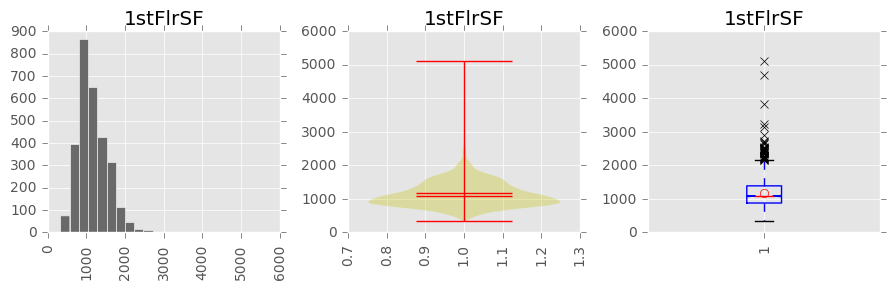

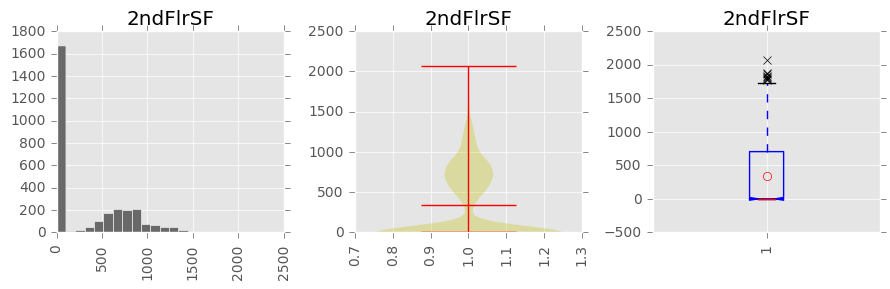

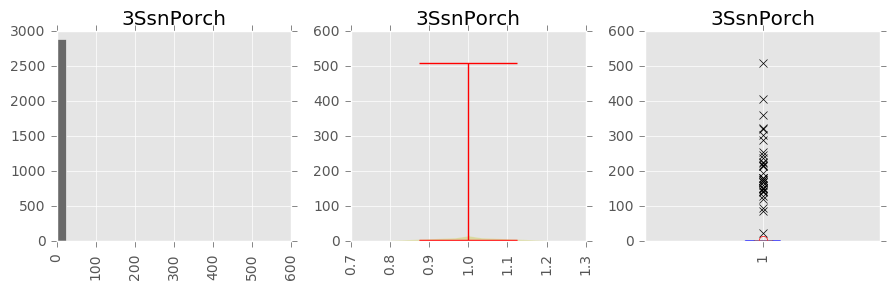

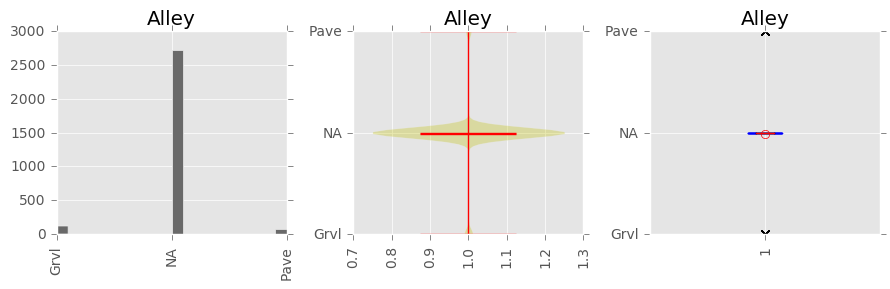

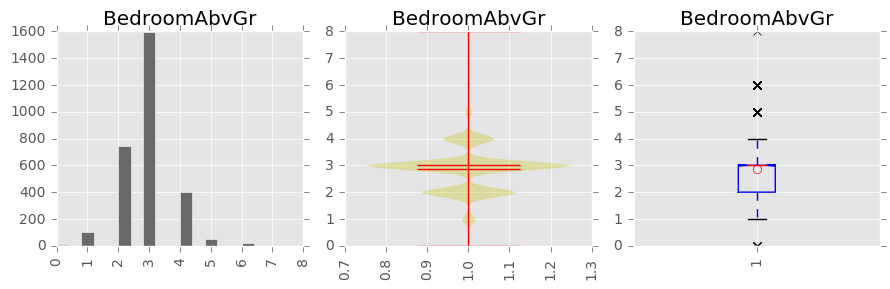

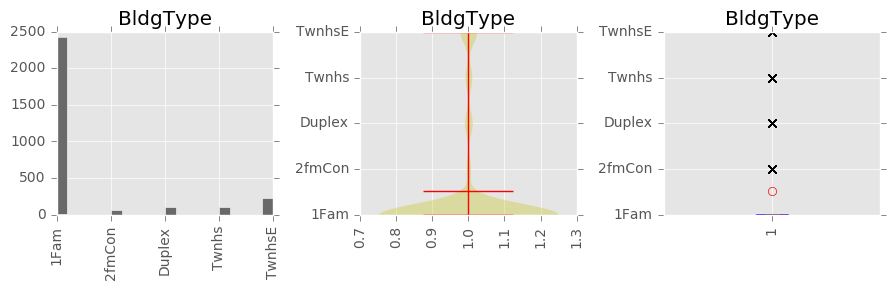

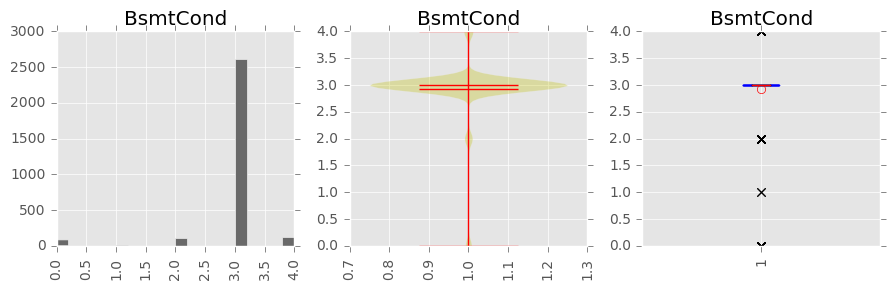

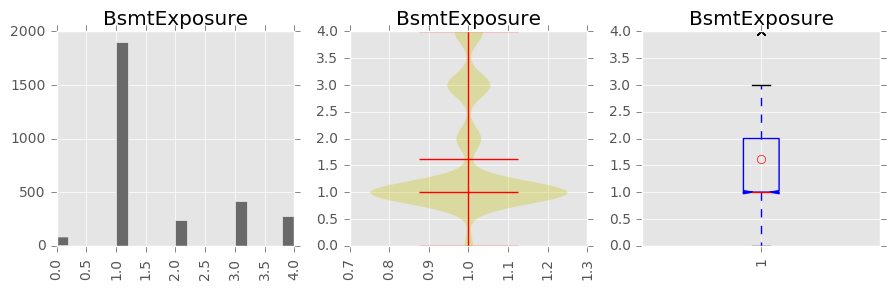

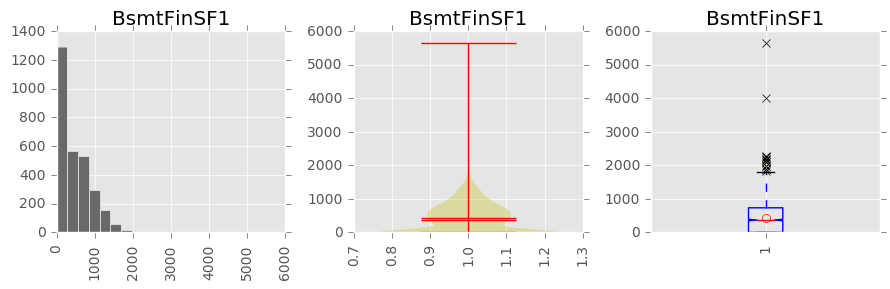

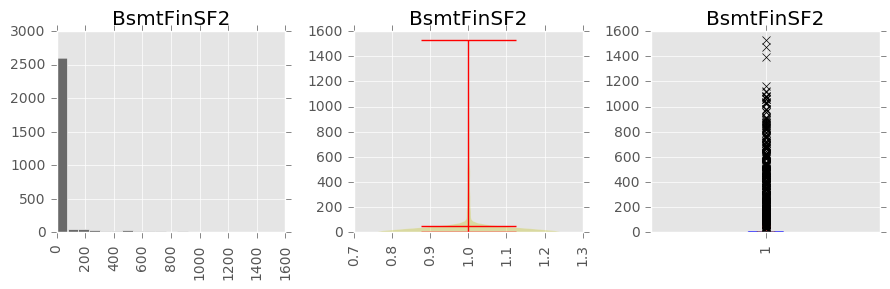

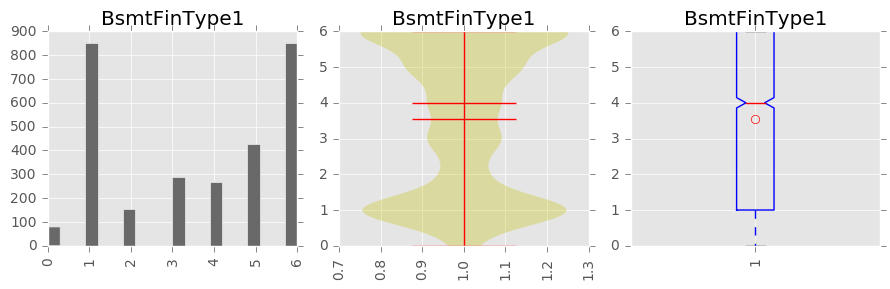

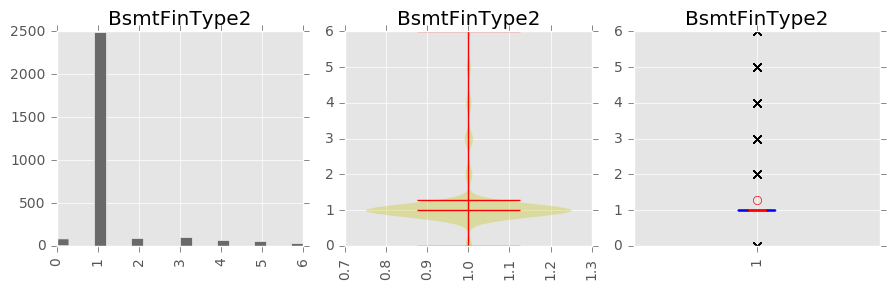

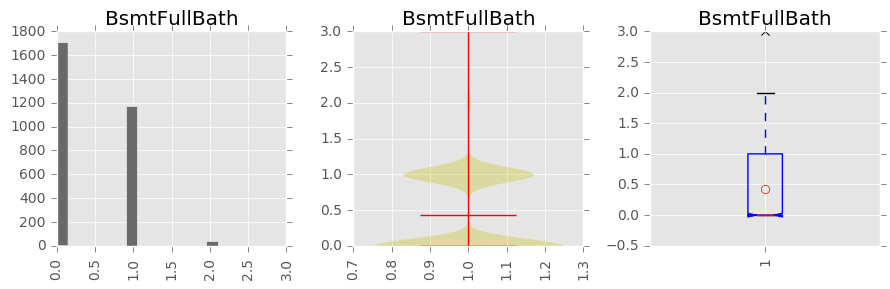

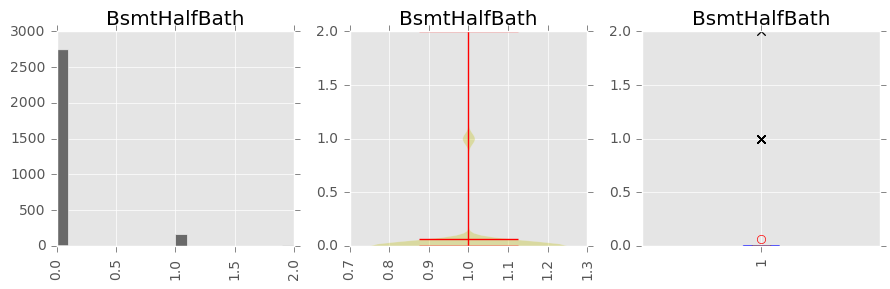

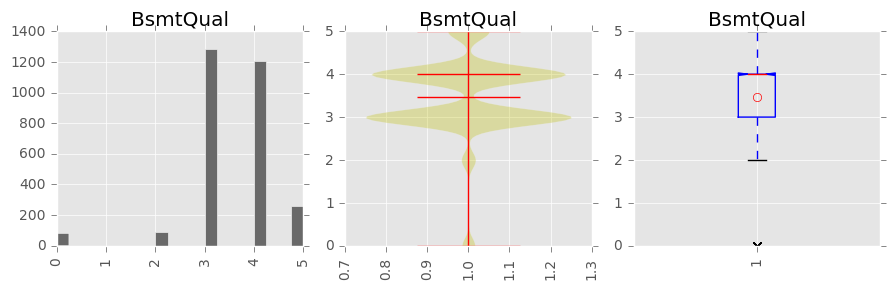

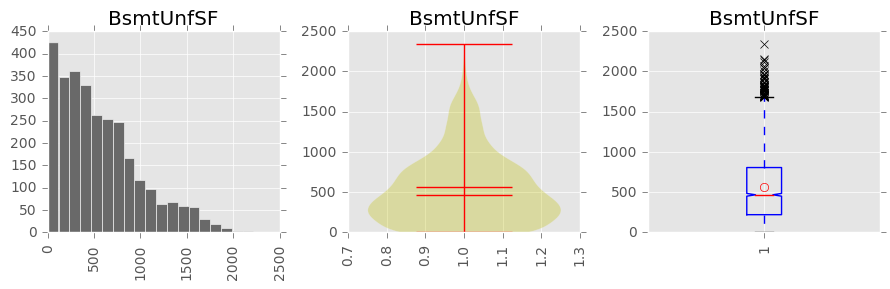

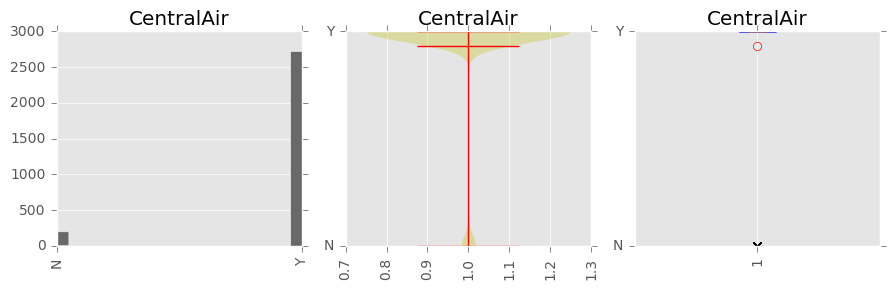

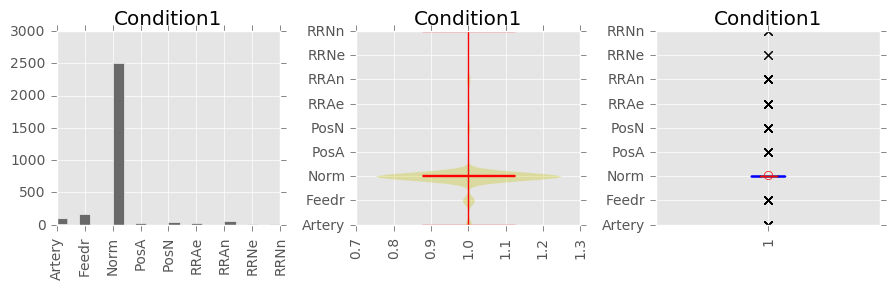

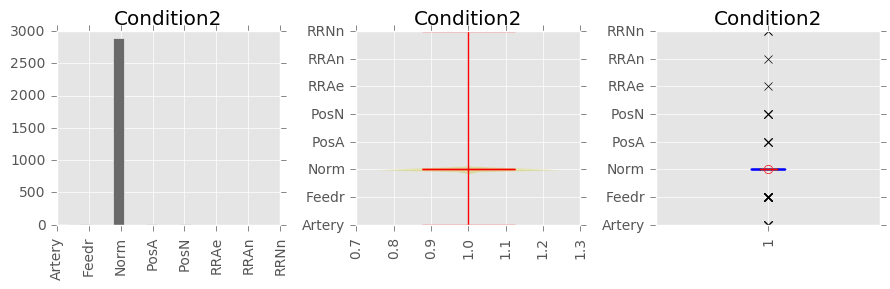

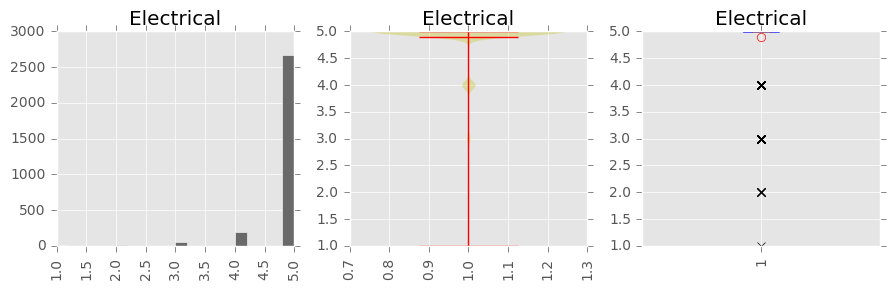

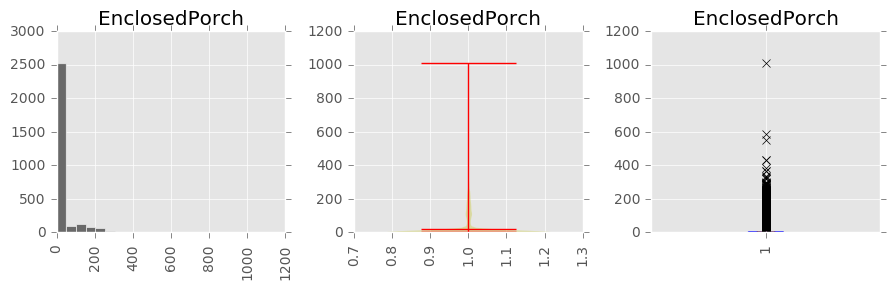

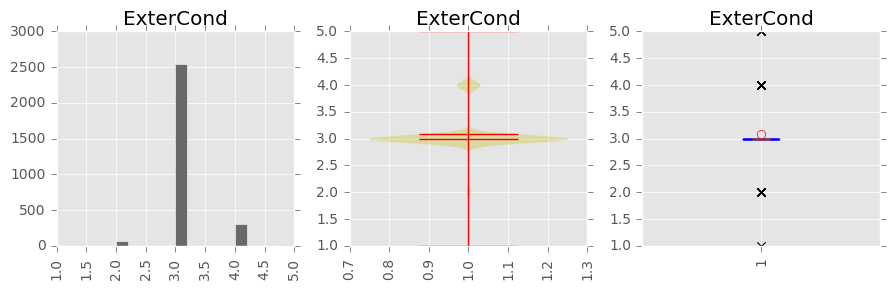

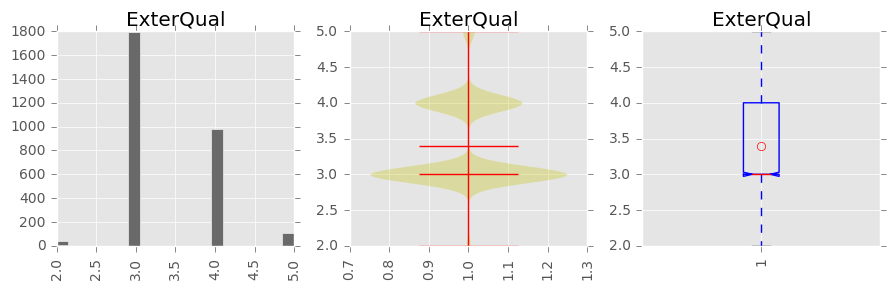

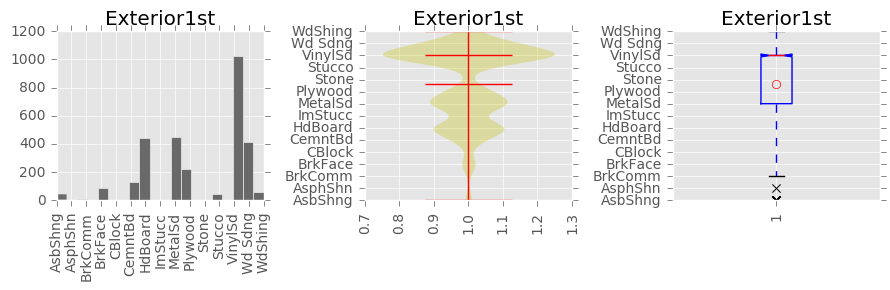

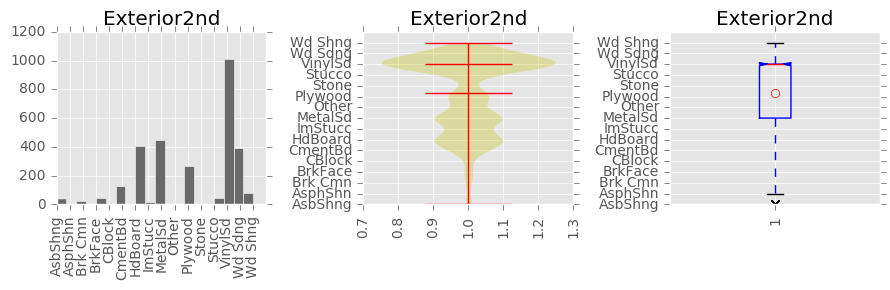

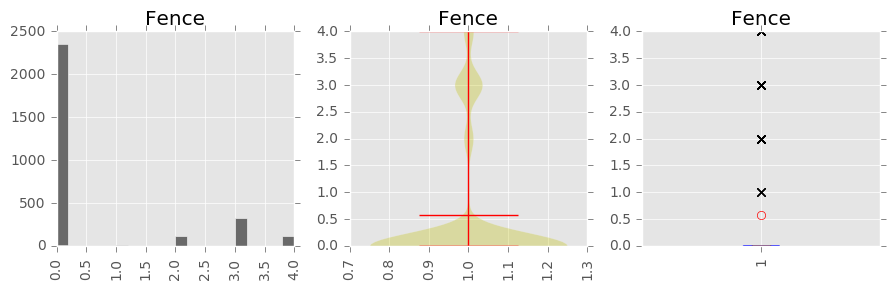

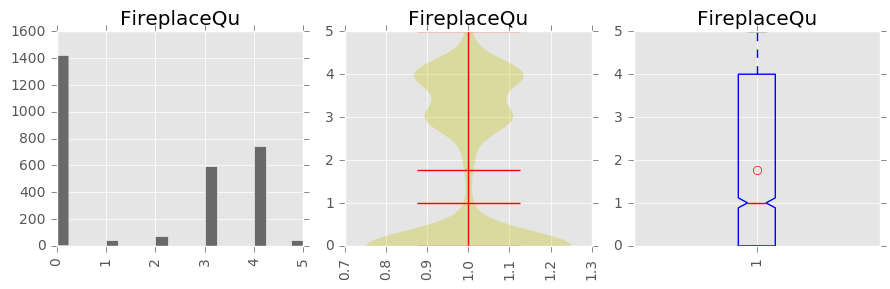

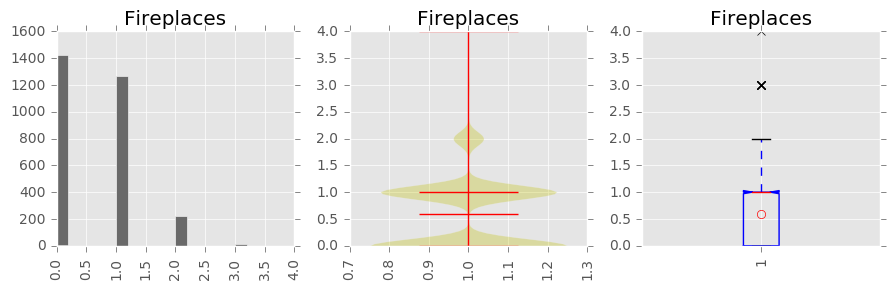

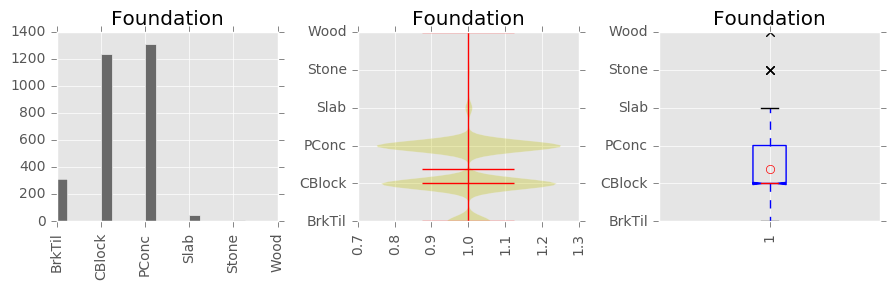

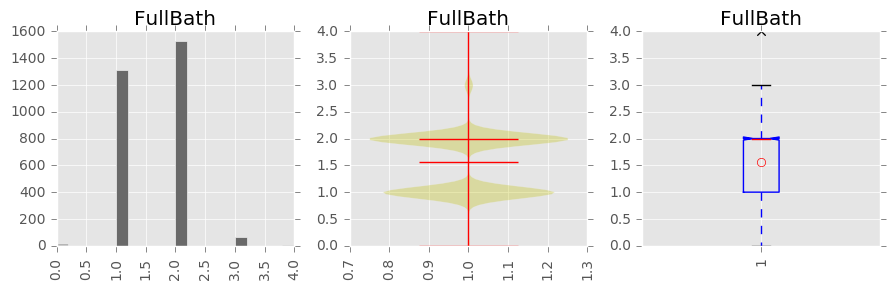

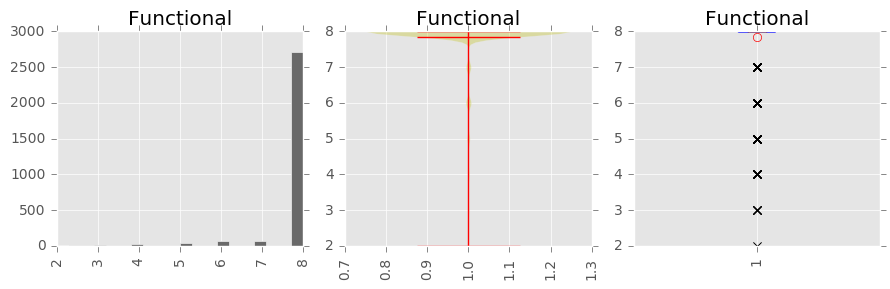

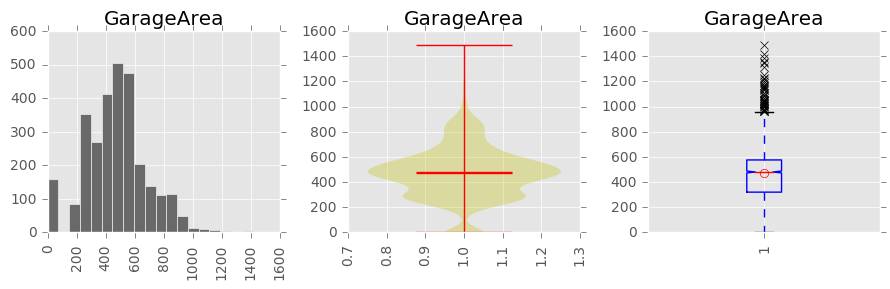

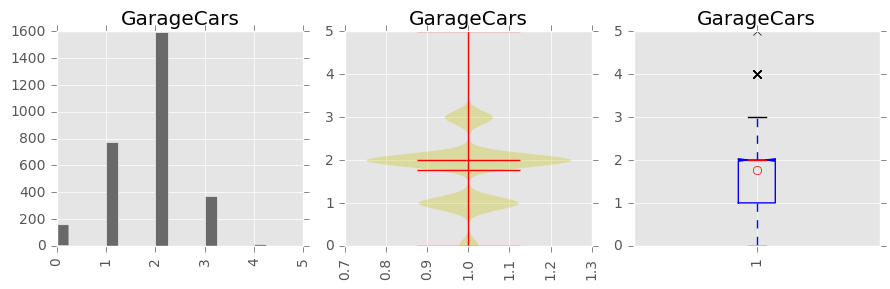

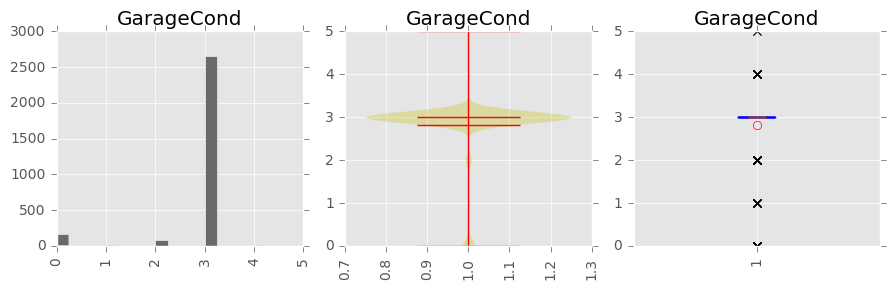

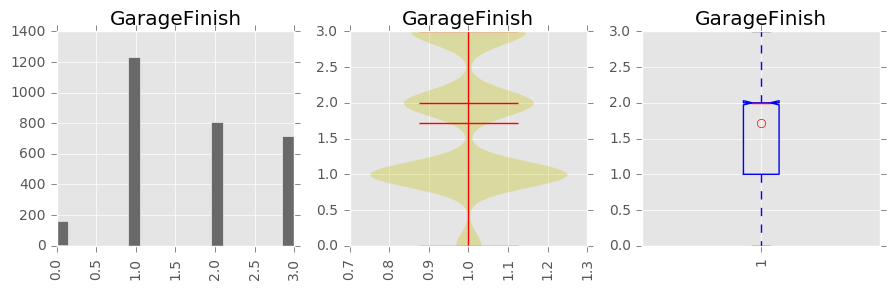

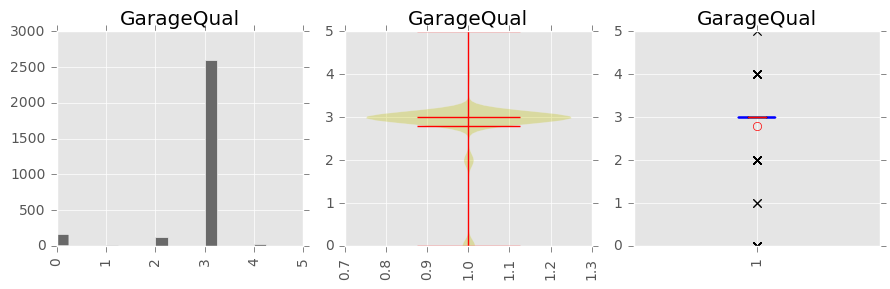

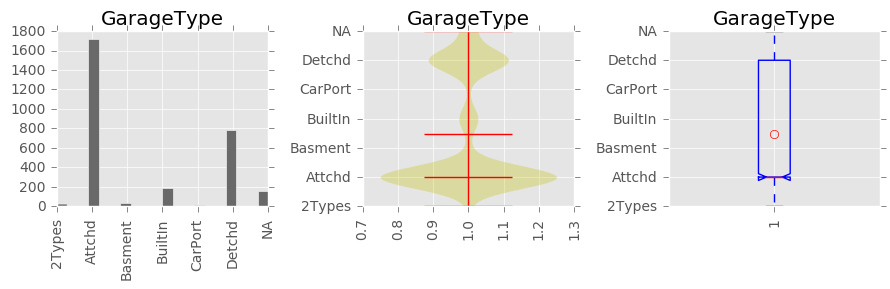

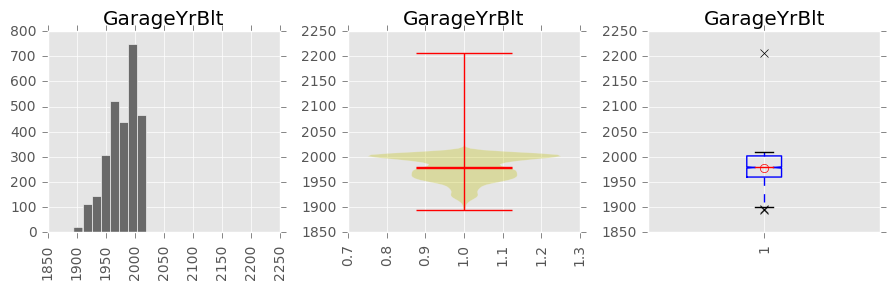

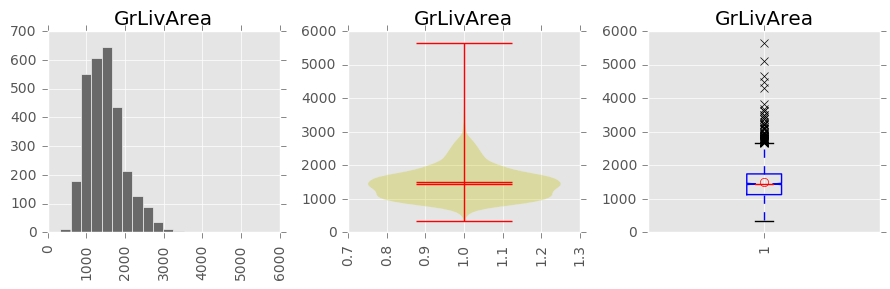

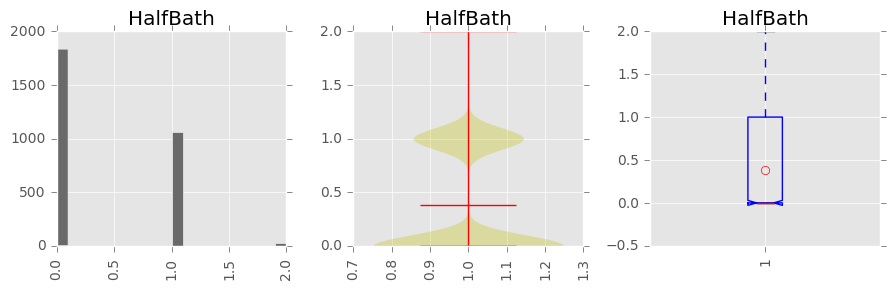

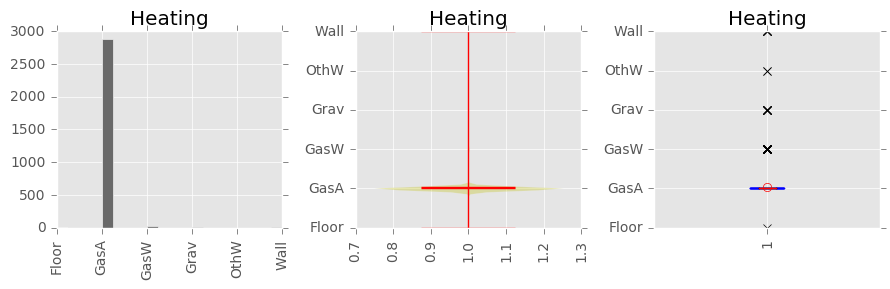

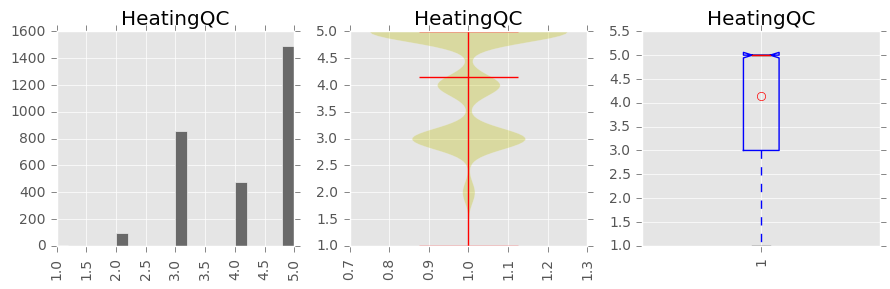

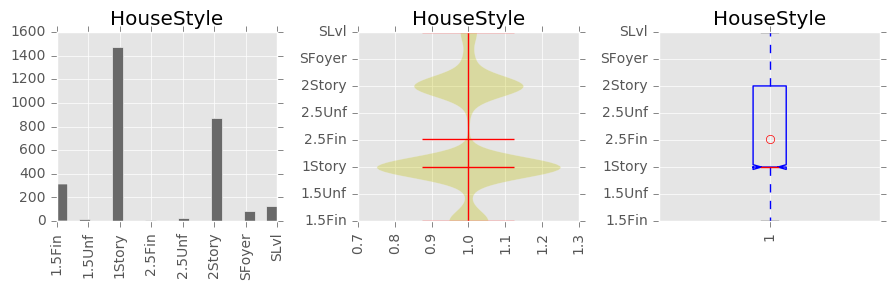

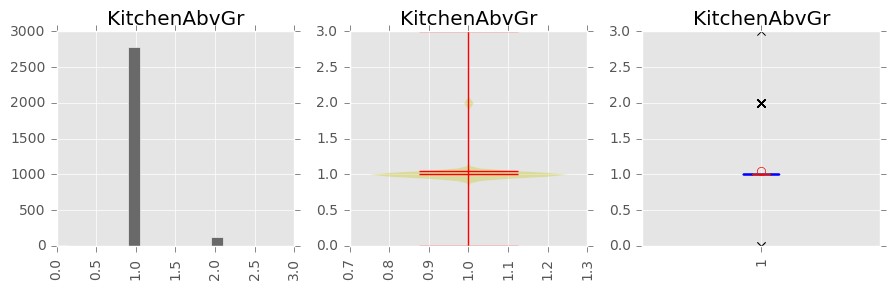

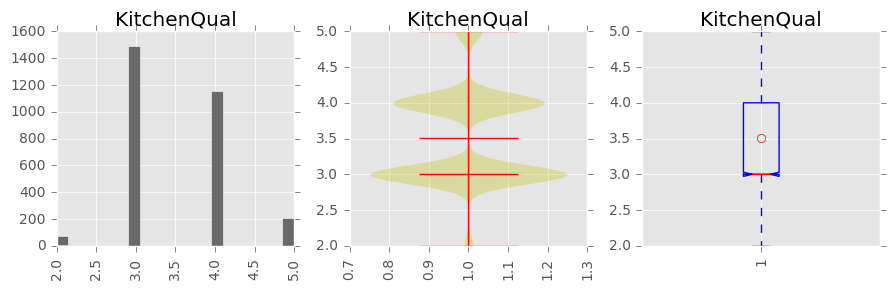

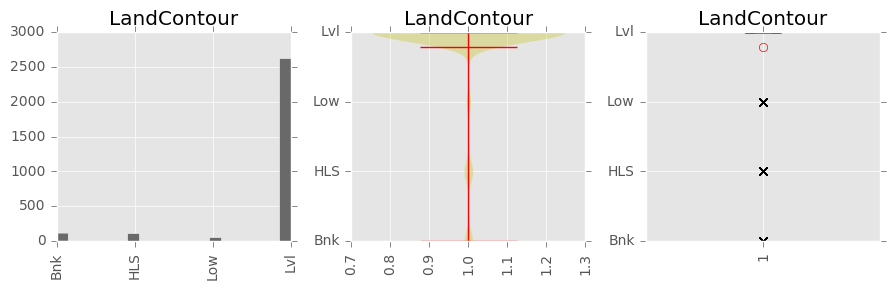

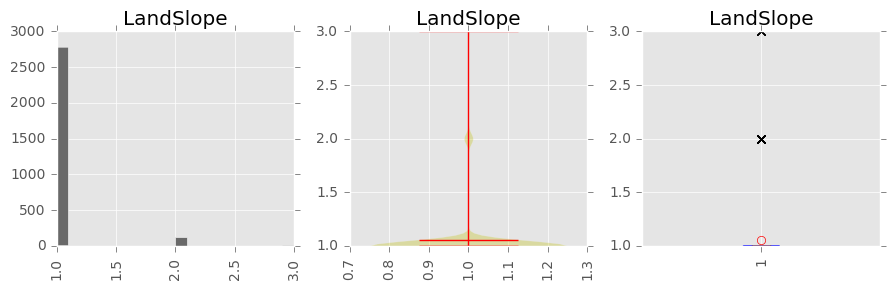

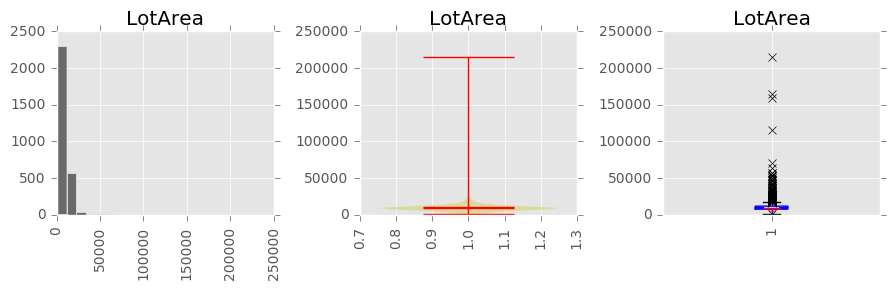

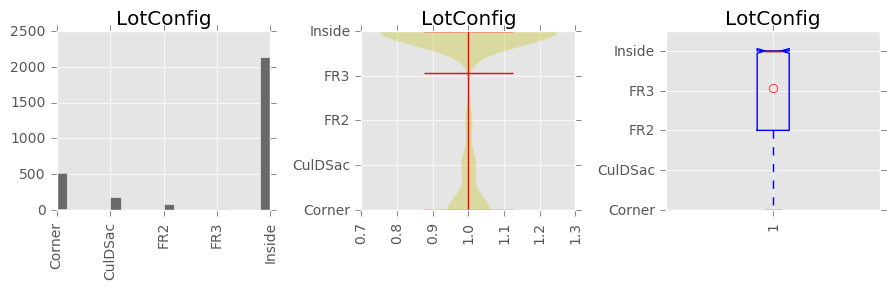

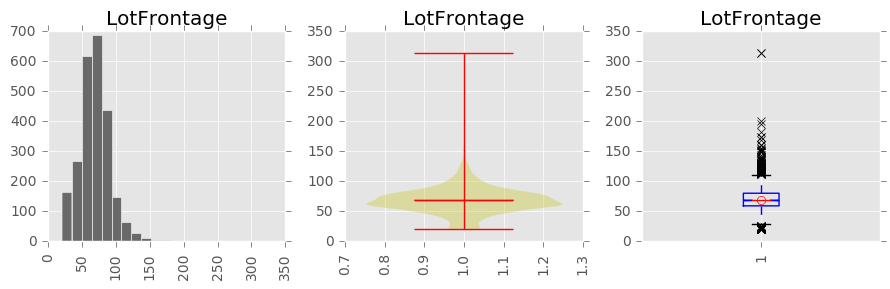

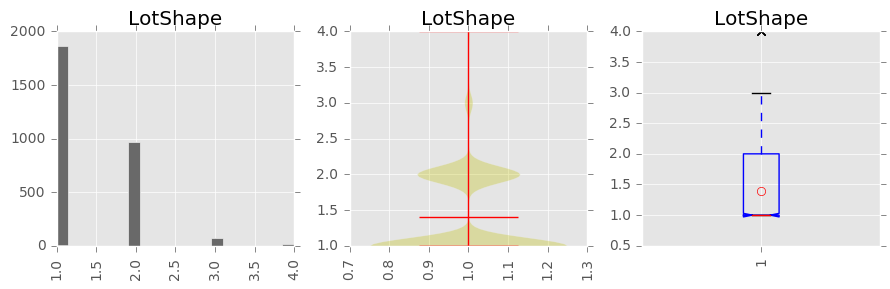

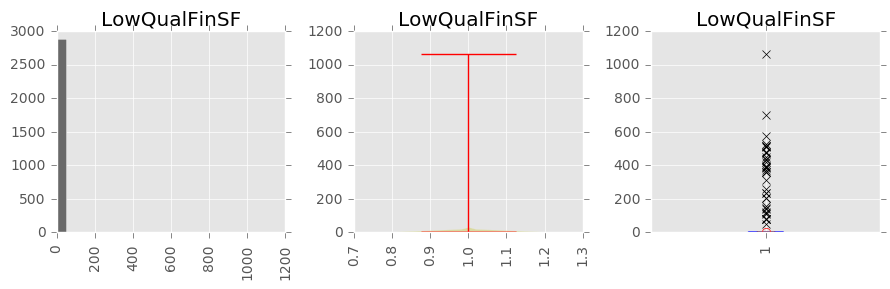

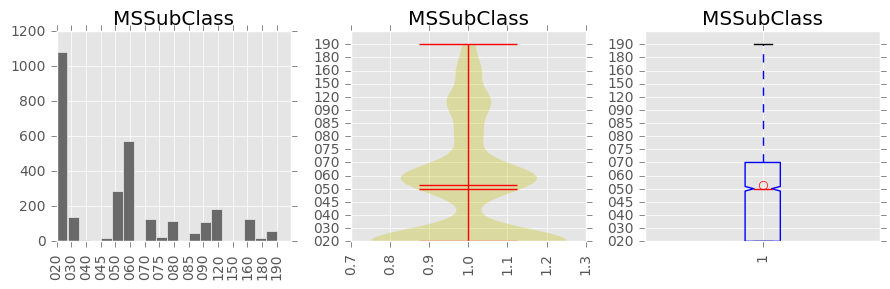

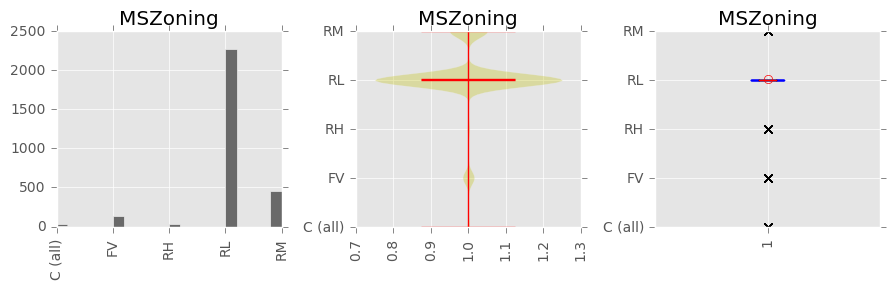

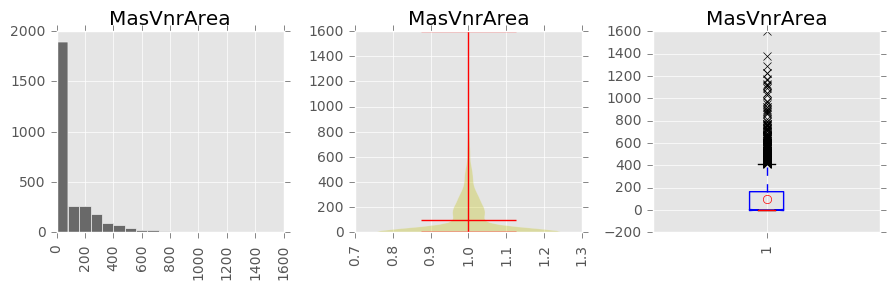

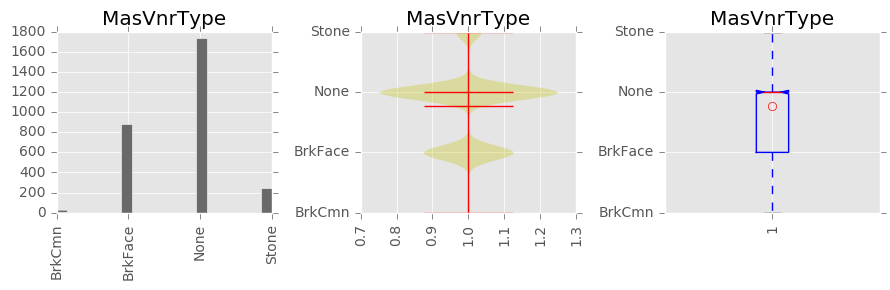

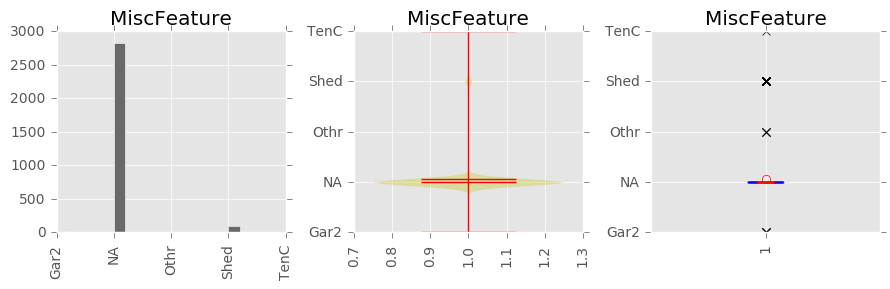

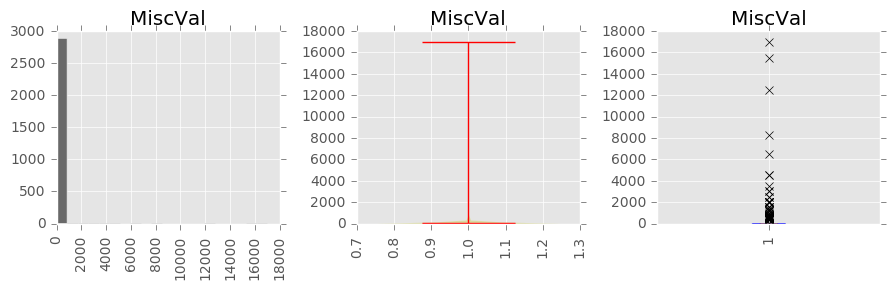

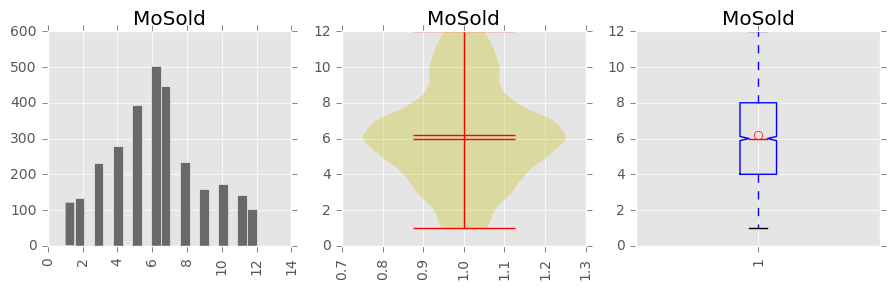

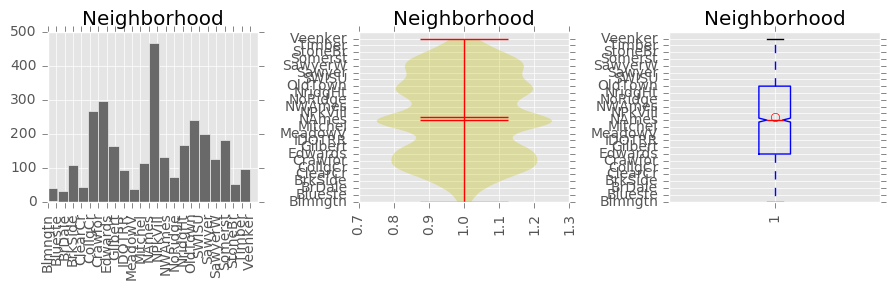

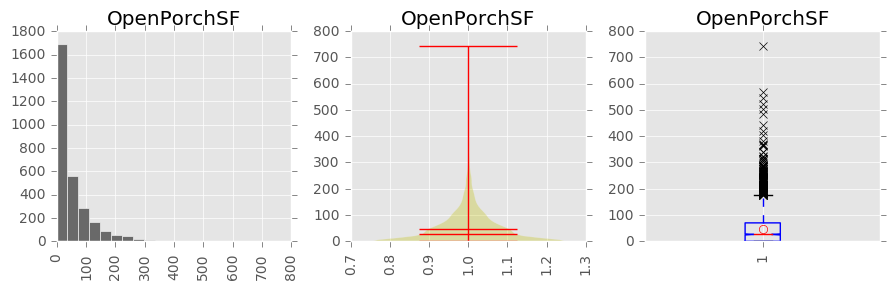

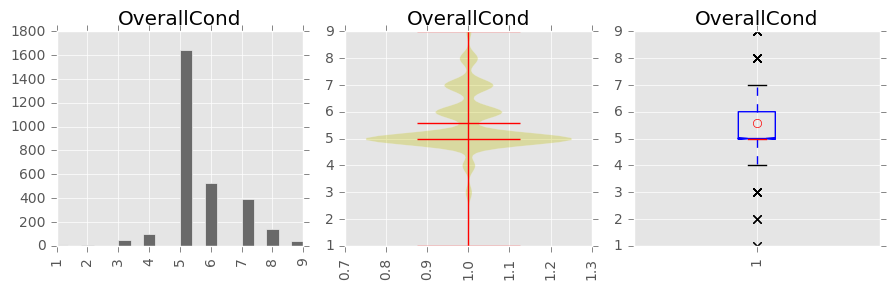

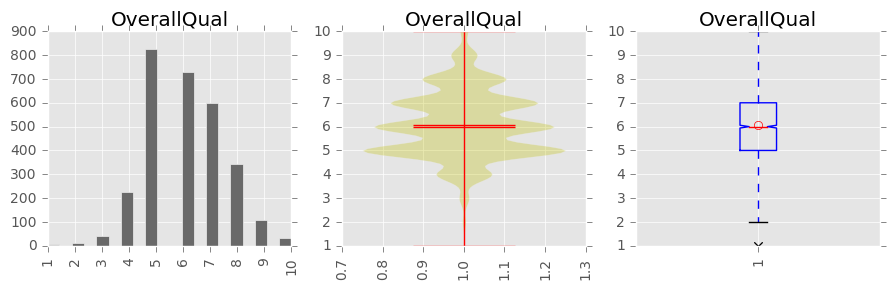

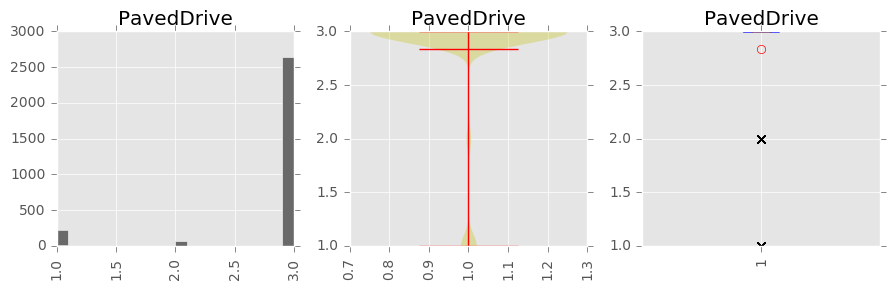

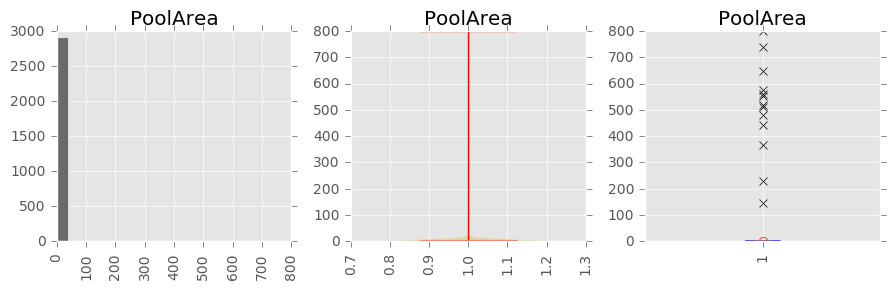

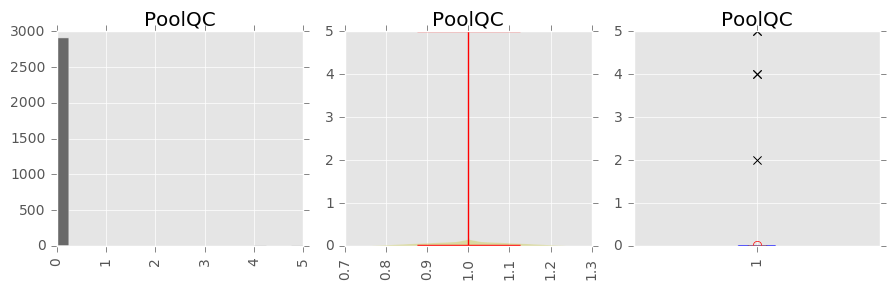

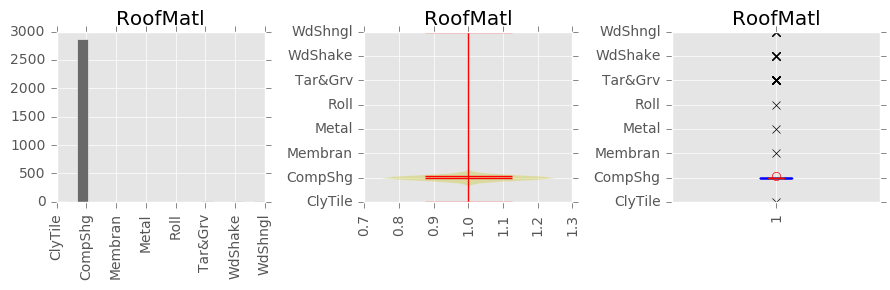

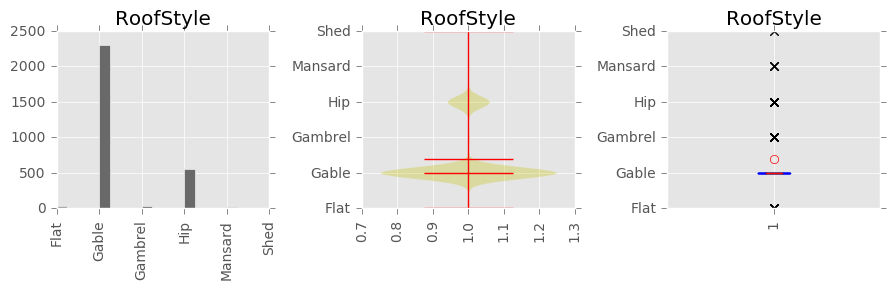

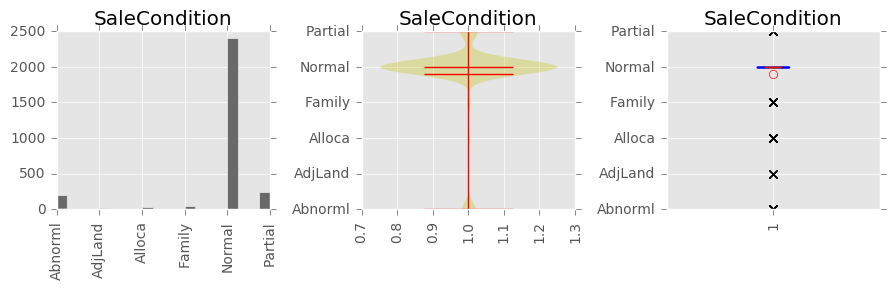

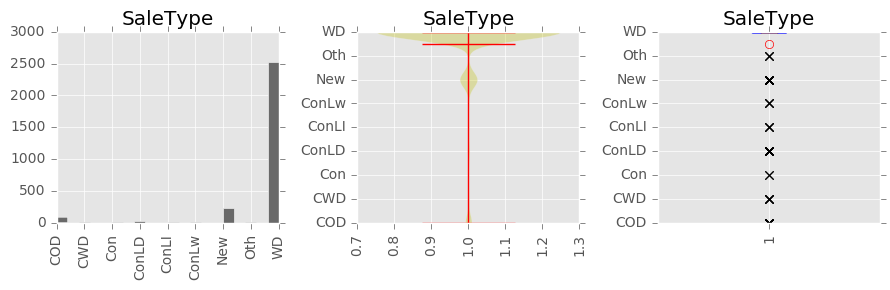

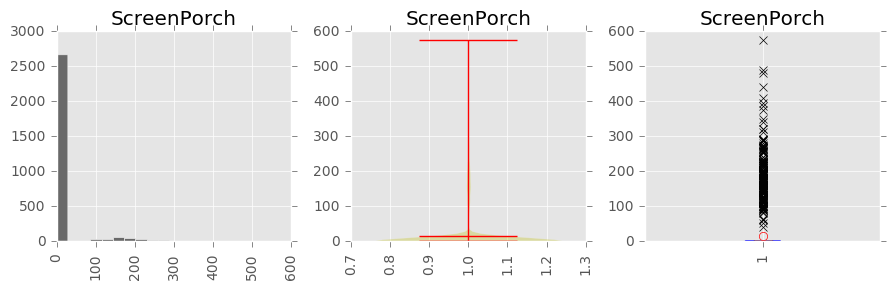

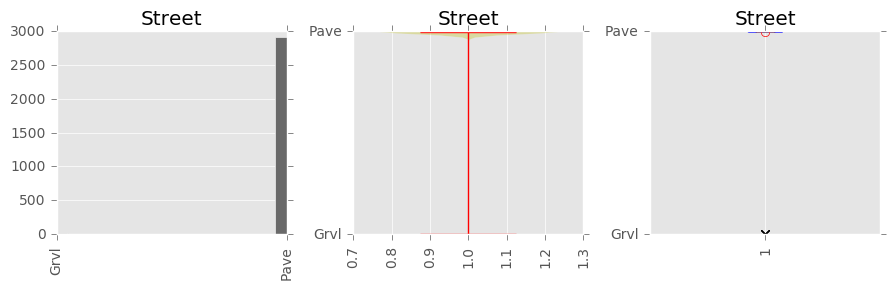

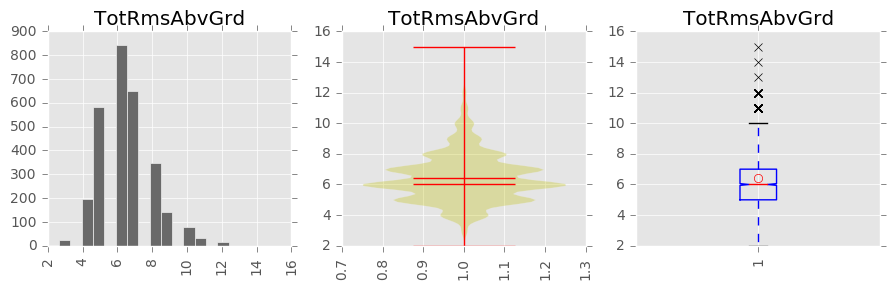

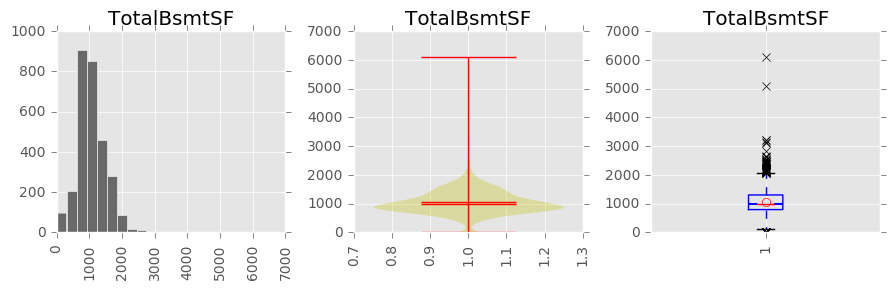

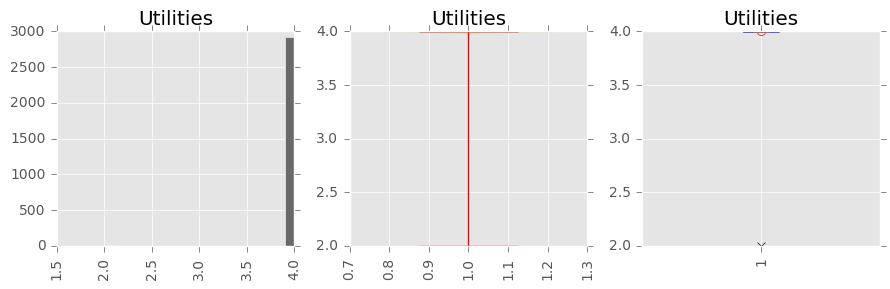

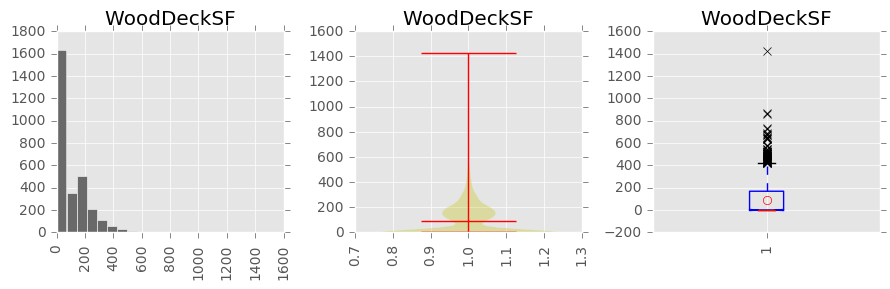

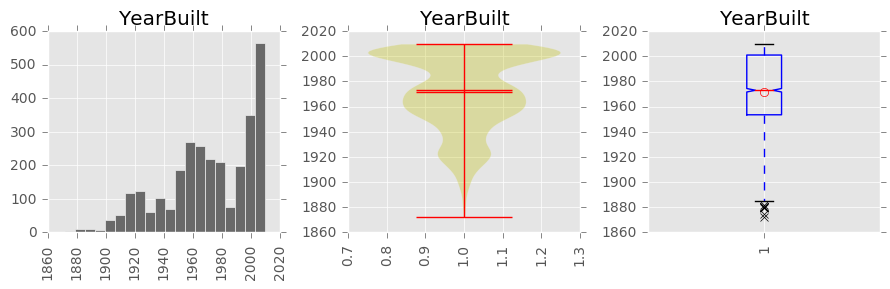

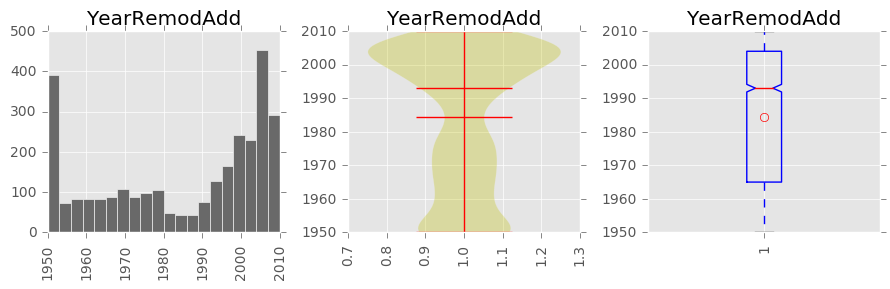

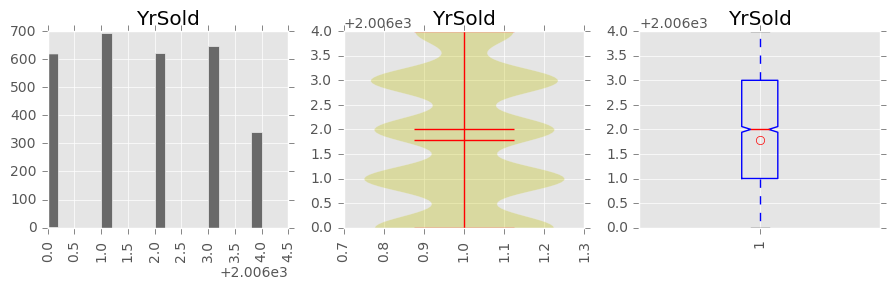

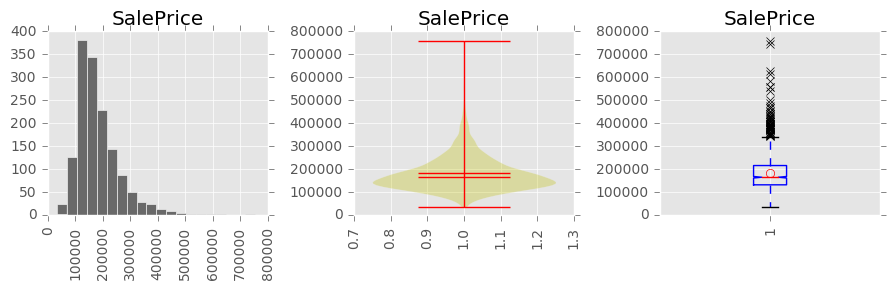

In [23]:
for col in df3.columns:
    plot_feature(df3.loc[:, col], plots=plots, lencoder=lencoders[col])

Some interesting observations made from these plots:
- `SalePrice`'s values are mostly concentrated around 100-200k, and they follow a slightly skewed bell-shaped curve. Prices above ~350k are rare (outliers).
- People are about 5 times more likely to buy houses during summer (June, July) than in winter (December-February), as `MoSold` states.
- The vast majority of sold houses don't have any pool (i.e. `PoolArea` = 0). The same goes for screen porch (`ScreenPorch`), three season porch (`3SsnPorch`), and enclosed porch (`EnclosedPorch`).
- Most garages were built in more recent years (`GarageYrBlt` > 2000). A few of them are VERY old, being built almost a century ago. And similar observations also apply for houses (`YearBuilt`), since some of them were built in the 19th century.
- Most houses were remodeled in more recent years (`YearRemodelAdd` > 2000), but there is also a very large number of houses which are not remodeled since the 1950s.

### Feature correlations

In [24]:
def plot_correlations(df):
    """Plots a heatmap of the correlations between every pair of numerical features.
    
    Inputs:
        df  Input data as a pandas.DataFrame object.
    
    Outputs:
        The correlation matrix as a pandas.DataFrame object.
    """
    fig, ax = plt.subplots(figsize=(11, 9))
    df_corr = df.corr()
    heatmap = ax.pcolor(df_corr, cmap=plt.cm.RdBu, vmin=-1.0, vmax=1.0)
    ax.xaxis.tick_top()
    ax.invert_yaxis()
    ax.set_yticks(np.arange(df_corr.shape[0]) + 0.5, minor=False)
    ax.set_xticks(np.arange(df_corr.shape[1]) + 0.5, minor=False)
    ax.set_xticklabels(df_corr.index)
    ax.set_yticklabels(df_corr.columns)
    plt.xticks(rotation=90)
    plt.colorbar(heatmap)
    plt.show()
    
    return df_corr

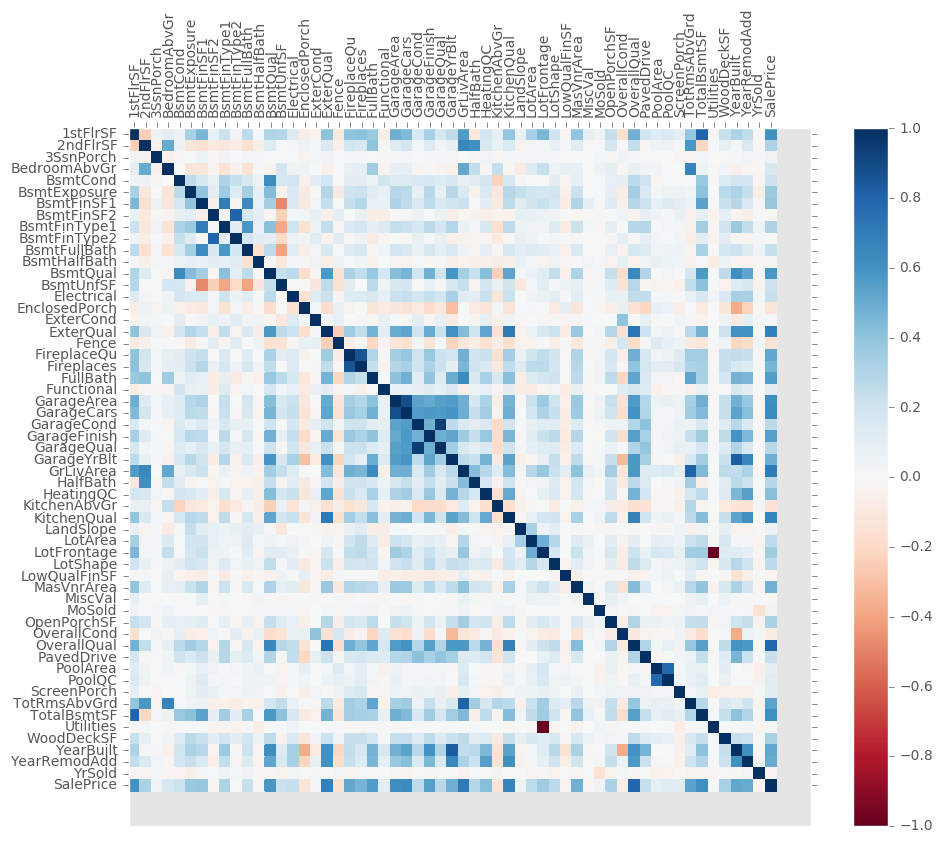

In [25]:
df3_corr = plot_correlations(df3)

According to the graph, the numerical features more strongly correlated to `SalePrice` are:
- `1stFlrSF` (first floor square feet)
- `BsmtQual` (evaluates the height of the basement )
- `ExterQual` (evaluates the quality of the material on the exterior)
- `GarageArea` (size of garage in square feet)
- `GarageCars` (size of garage in car capacity)
- `GrLivArea` (above grade (ground) living area square feet)
- `KitchenQual` (kitchen quality)
- `OverallQual` (overall material and finish of the house [from 1 to 10])
- `TotalBsmtSF` (total square feet of basement area)

Interestingly, `OverallCond` is very weakly correlated to `SalePrice`. A house in good condition is not necessarily expensive.

Strong correlations that show possibly redundant features:
- `GarageArea` and `GarageCars` ==> the larger the garage, the higher its car capacity too
- `BsmtUnfSF` and `BsmtFinSF1` ==> a larger unfinished basement area means a smaller finished basement area

Some interesting positive correlations:
- `OverallQual` and `ExterQual` ==> the perceived overall quality of a house is correlated to the exterior quality
- `OverallQual` and `BsmtQual` ==> the perceived overall quality of a house is correlated to the basement quality
- `PoolQC` and `PoolArea` ==> the perceived quality of a pool is correlated to its area
- `BsmtQual` and `BsmtCond` ==> the perceived general condition of a basement is correlated to its height
- `GarageQual` and `GarageCond` ==> the perceived general condition of a garage is correlated to the quality of its materials
- `1stFlrSF` and `TotalBsmtSF` == the basement area is correlated to the house's 1st floor area
- `YrBlt` and `GarageYrBlt` ==> a house and its garage are commonly built together

And some interesting negative correlations:
- `OverallCond` and `YrBuilt` ==> better overall condition is correlated to older houses
- `EnclosedPorch` and `YrBuilt` (or `GarageYrBlt`) ==> larger enclosed porch areas are correlated to older houses
- `BsmtUnfSF` and `BsmtFullBath` ==> a larger unfinished basement area is correlated to a smaller number of full bathrooms in the house
- `BsmtUnfSF` and `BsmtFinType1` ==> a larger unfinished basement area is correlated to a lower rating of the finished basement area

`LotFrontage` and `Utilities` are shown to have a very high negative correlation, but actually this only happened because `LotFrontage`'s value is missing exactly in the only sample `Utilities`'s value is different than its most frequent value (`4.0`).

## 4. Skewed/unbalanced features
Several machine learning algorithms require feature values to be approximately normally distributed. This ideal scenario hardly happens in real-world problems; however, we can at least put things in better shape by handling skewness and extreme unbalances in the data. Some features are transformed, others are completely removed since they hardly would provide any useful information.

In [26]:
import scipy.stats as stats

In [27]:
discrete_cols = ['YearBuilt', 'YearRemodAdd', 'BsmtFullBath', 'BsmtHalfBath',
                 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
                 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'MoSold', 'YrSold']
ordinal_cols = ['LotShape', 'Utilities', 'LandSlope', 'ExterQual', 'ExterCond', 'BsmtQual',
                'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'HeatingQC',
                'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageFinish',
                'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence']

numerical_cols = ordinal_cols + discrete_cols + continuous_cols
numerical_cols.sort()

In [28]:
df3_skew = df3[numerical_cols].apply(lambda col: stats.skew(col.dropna()), axis=0)
df3_skew

1stFlrSF          1.469604
2ndFlrSF          0.861675
3SsnPorch        11.376065
BedroomAbvGr      0.326324
BsmtCond         -3.604111
BsmtExposure      1.116729
BsmtFinSF1        1.424989
BsmtFinSF2        4.145323
BsmtFinType1     -0.149544
BsmtFinType2      3.152338
BsmtFullBath      0.623741
BsmtHalfBath      3.929996
BsmtQual         -1.268542
BsmtUnfSF         0.919351
Electrical       -4.193055
EnclosedPorch     4.003891
ExterCond         1.315913
ExterQual         0.786382
Fence             1.754829
FireplaceQu       0.172181
Fireplaces        0.733495
FullBath          0.167606
Functional       -4.961675
GarageArea        0.241176
GarageCars       -0.218260
GarageCond       -3.383121
GarageFinish      0.135534
GarageQual       -3.263676
GarageYrBlt      -0.381942
GrLivArea         1.269358
HalfBath          0.694566
HeatingQC        -0.549910
KitchenAbvGr      4.302254
KitchenQual       0.437959
LandSlope         4.975157
LotArea          12.822431
LotFrontage       1.502351
L

In [29]:
df3_q1 = df3[numerical_cols].apply(lambda col: col.dropna().quantile(0.25), axis=0)
df3_q3 = df3[numerical_cols].apply(lambda col: col.dropna().quantile(0.75), axis=0)
df3_iqr = df3_q3 - df3_q1
df3_qrange = (df3_q3 + 1.5 * df3_iqr) - (df3_q1 - 1.5 * df3_iqr)
df3_qrange

1stFlrSF           2046.0
2ndFlrSF           2816.0
3SsnPorch             0.0
BedroomAbvGr          4.0
BsmtCond              0.0
BsmtExposure          4.0
BsmtFinSF1         2932.0
BsmtFinSF2            0.0
BsmtFinType1         20.0
BsmtFinType2          0.0
BsmtFullBath          4.0
BsmtHalfBath          0.0
BsmtQual              4.0
BsmtUnfSF          2342.0
Electrical            0.0
EnclosedPorch         0.0
ExterCond             0.0
ExterQual             4.0
Fence                 0.0
FireplaceQu          16.0
Fireplaces            4.0
FullBath              4.0
Functional            0.0
GarageArea         1024.0
GarageCars            4.0
GarageCond            0.0
GarageFinish          4.0
GarageQual            0.0
GarageYrBlt         168.0
GrLivArea          2470.0
HalfBath              4.0
HeatingQC             8.0
KitchenAbvGr          0.0
KitchenQual           4.0
LandSlope             0.0
LotArea           16368.0
LotFrontage          84.0
LotShape              4.0
LowQualFinSF

In [30]:
unbalanced_cols = df3_qrange[df3_qrange < 1e-5].index.tolist()
unbalanced_cols

['3SsnPorch',
 'BsmtCond',
 'BsmtFinSF2',
 'BsmtFinType2',
 'BsmtHalfBath',
 'Electrical',
 'EnclosedPorch',
 'ExterCond',
 'Fence',
 'Functional',
 'GarageCond',
 'GarageQual',
 'KitchenAbvGr',
 'LandSlope',
 'LowQualFinSF',
 'MiscVal',
 'PavedDrive',
 'PoolArea',
 'PoolQC',
 'ScreenPorch',
 'Utilities']

In [31]:
unbalanced_cols_2 = unbalanced_cols + ['Condition2', 'Heating', 'MiscFeature', 'RoofMatl', 'Street']
unbalanced_cols_2

['3SsnPorch',
 'BsmtCond',
 'BsmtFinSF2',
 'BsmtFinType2',
 'BsmtHalfBath',
 'Electrical',
 'EnclosedPorch',
 'ExterCond',
 'Fence',
 'Functional',
 'GarageCond',
 'GarageQual',
 'KitchenAbvGr',
 'LandSlope',
 'LowQualFinSF',
 'MiscVal',
 'PavedDrive',
 'PoolArea',
 'PoolQC',
 'ScreenPorch',
 'Utilities',
 'Condition2',
 'Heating',
 'MiscFeature',
 'RoofMatl',
 'Street']

In [32]:
df4 = df3.drop(unbalanced_cols_2, axis=1)
df4.shape

(2919, 54)

In [33]:
df4_skew = df3_skew.drop(unbalanced_cols)
df4_skew

1stFlrSF         1.469604
2ndFlrSF         0.861675
BedroomAbvGr     0.326324
BsmtExposure     1.116729
BsmtFinSF1       1.424989
BsmtFinType1    -0.149544
BsmtFullBath     0.623741
BsmtQual        -1.268542
BsmtUnfSF        0.919351
ExterQual        0.786382
FireplaceQu      0.172181
Fireplaces       0.733495
FullBath         0.167606
GarageArea       0.241176
GarageCars      -0.218260
GarageFinish     0.135534
GarageYrBlt     -0.381942
GrLivArea        1.269358
HalfBath         0.694566
HeatingQC       -0.549910
KitchenQual      0.437959
LotArea         12.822431
LotFrontage      1.502351
LotShape         1.261532
MasVnrArea       2.601240
MoSold           0.195884
OpenPorchSF      2.535114
SalePrice        1.880941
TotRmsAbvGrd     0.758367
TotalBsmtSF      1.162285
WoodDeckSF       1.842433
YearBuilt       -0.599806
YearRemodAdd    -0.451020
YrSold           0.132399
dtype: float64

In [34]:
skewed_cols = df4_skew[df4_skew.abs() > 0.7].index.tolist()
skewed_cols

['1stFlrSF',
 '2ndFlrSF',
 'BsmtExposure',
 'BsmtFinSF1',
 'BsmtQual',
 'BsmtUnfSF',
 'ExterQual',
 'Fireplaces',
 'GrLivArea',
 'LotArea',
 'LotFrontage',
 'LotShape',
 'MasVnrArea',
 'OpenPorchSF',
 'SalePrice',
 'TotRmsAbvGrd',
 'TotalBsmtSF',
 'WoodDeckSF']

In [35]:
df4[skewed_cols] = df4[skewed_cols].apply(lambda col: np.log1p(col.dropna()), axis=0)

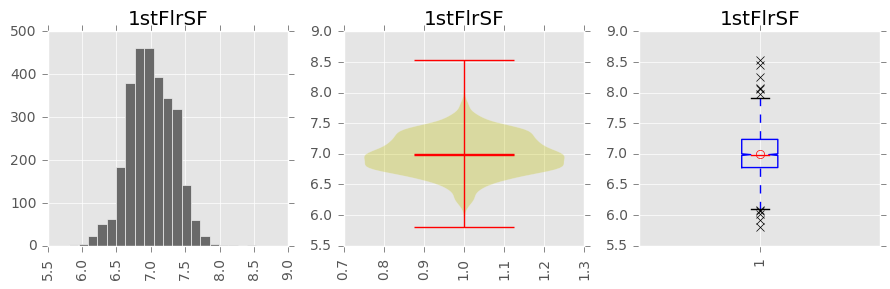

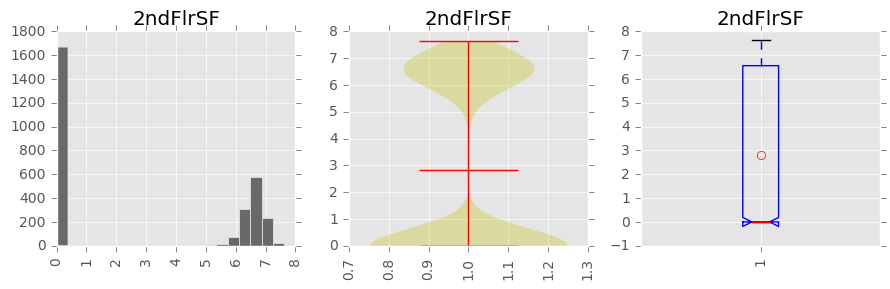

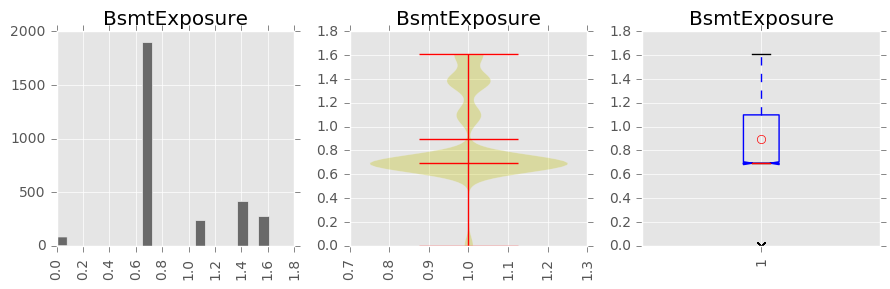

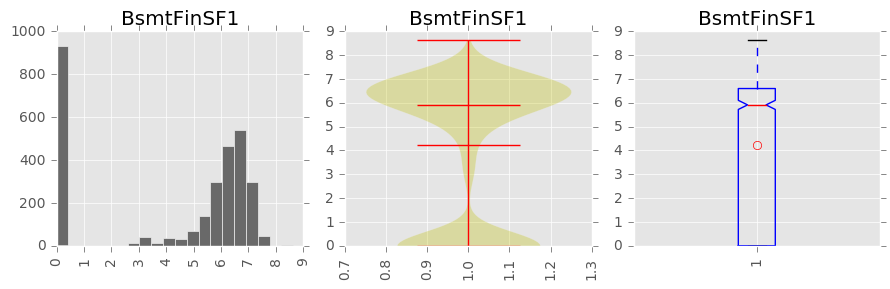

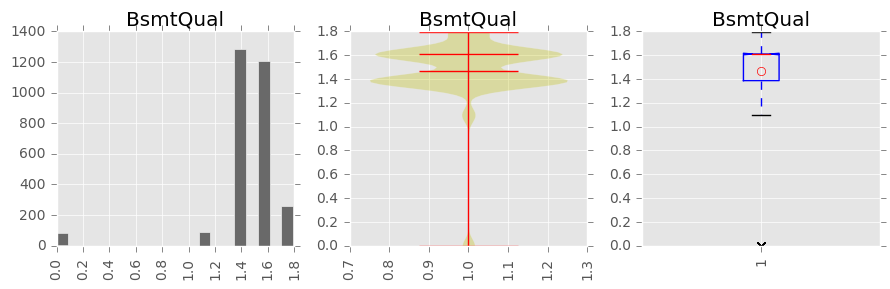

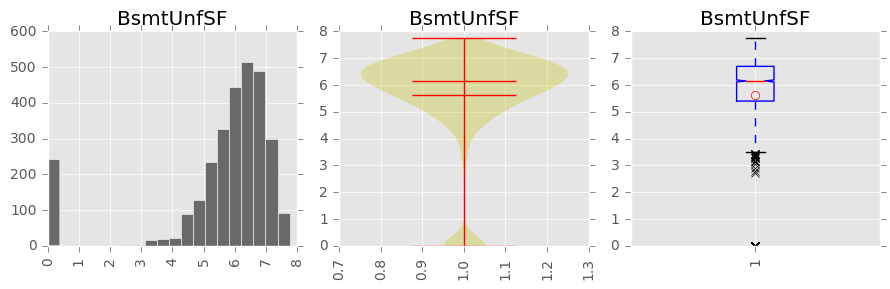

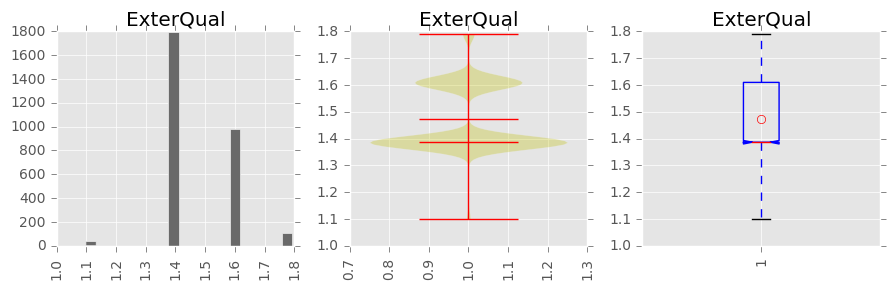

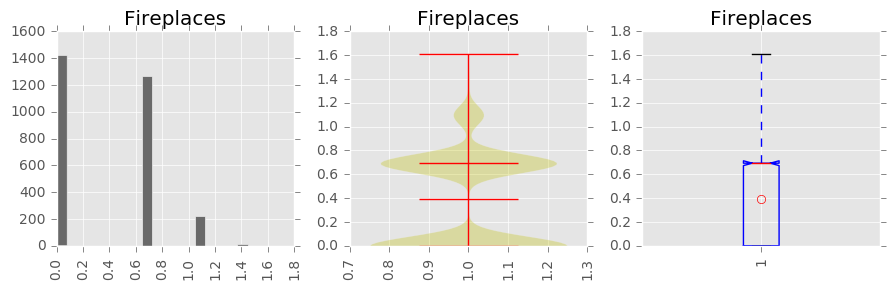

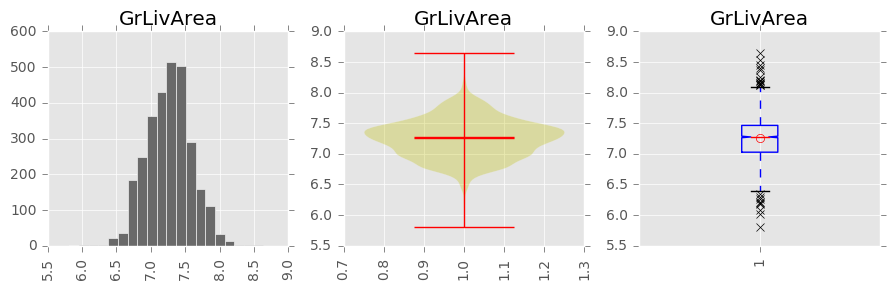

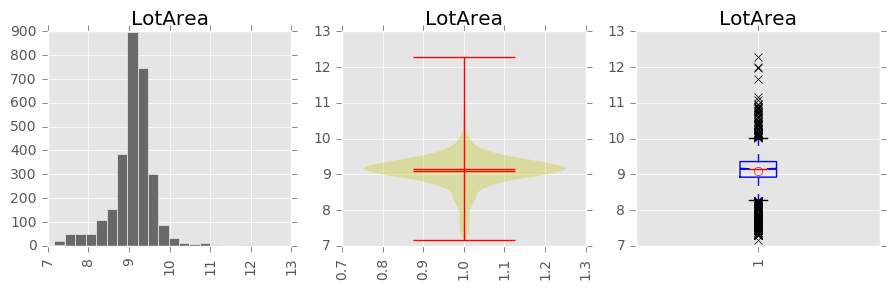

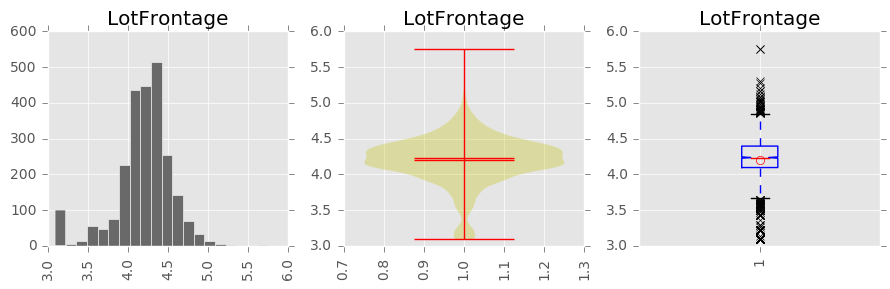

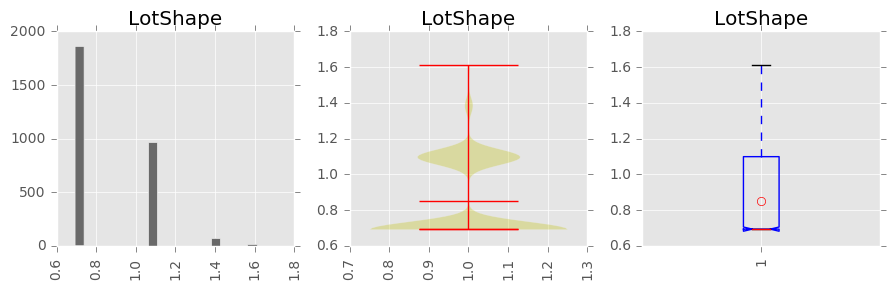

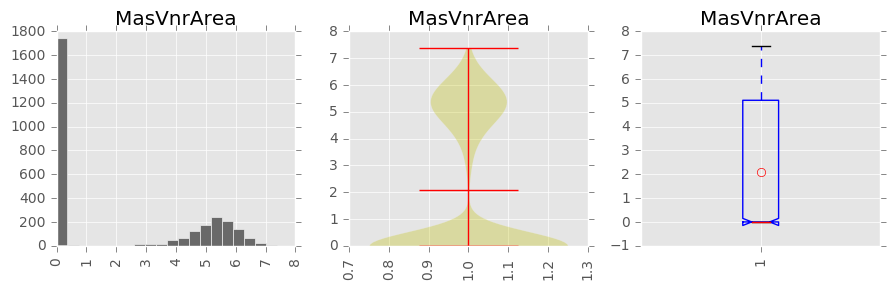

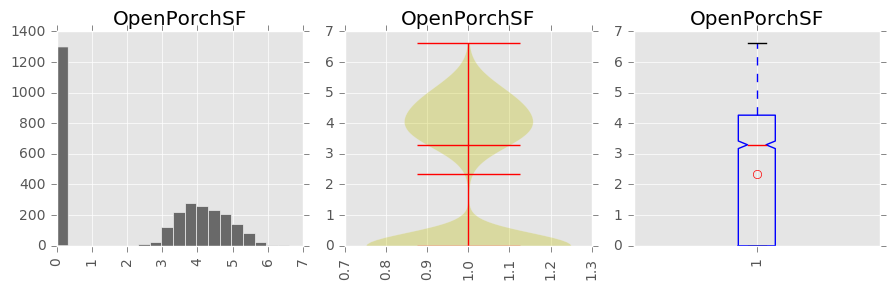

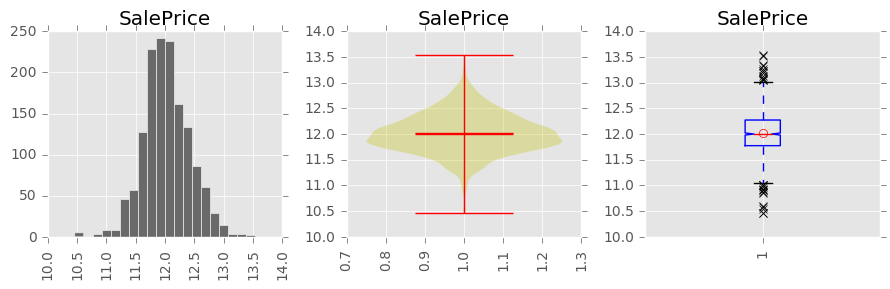

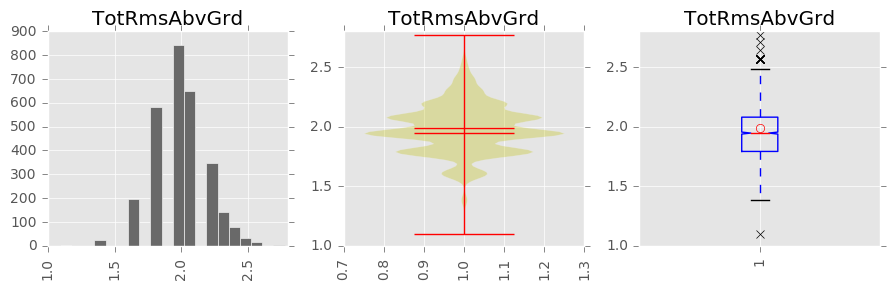

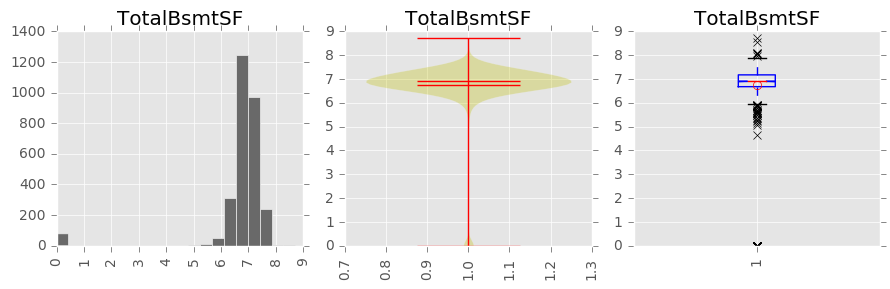

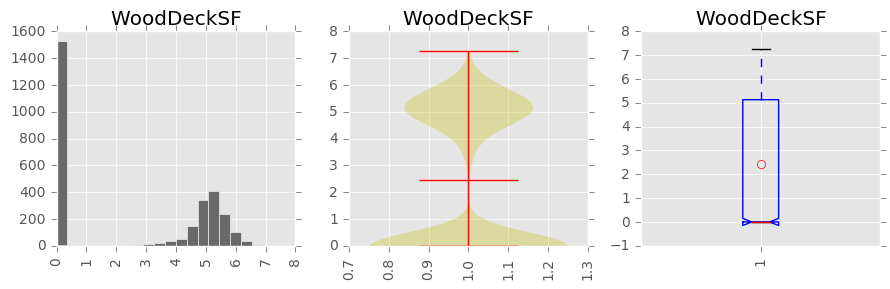

In [36]:
for col in skewed_cols:
    plot_feature(df4.loc[:, col], plots=plots, lencoder=lencoders[col])

## 5. Missing values
Time to fill the missing values that still remain. There are different approaches for doing this, but in every case the idea is the same: to preserve the original feature distribution as much as possible. When we have only a few missing values in a feature (say, less than 1% of the total), it does not really matter which method is used, provided that it makes sense. Filling with the mean, median or mode is usually a good idea.

I did something just a little different here. Rather than filling every missing value in a feature with the same mean/median/mode value, I randomly resample values from the feature's domain (with replacement) and fill each missing value with one of these resampled values. Actually, for features with unimodal distribution this method is quite similar to filling with the mean/median/mode, since the resampled values will follow the original feature's distribution. I'm ajust adding some "noise" (randomness) to the process.

When a feature is strongly correlated to others, by the way, a more interesting approach involves building a simple predictive model just to predict the missing values. The subset of features more strongly correlated to the feature of interest are used as input variables. Such approach is used here to fill the missing values in `GarageYrBlt` (which is strongly correlated to `YearBuilt` and `YearRemodAdd`).

In [37]:
df5 = df4.copy()

In [38]:
missing = df5.apply(lambda col: col.isnull().sum(), axis=0)
missing[missing > 0]

BsmtFinSF1         1
BsmtFullBath       2
BsmtUnfSF          1
Exterior1st        1
Exterior2nd        1
GarageArea         1
GarageCars         1
GarageYrBlt      159
KitchenQual        1
LotFrontage      486
MSZoning           4
MasVnrArea        23
MasVnrType        24
SaleType           1
TotalBsmtSF        1
SalePrice       1459
dtype: int64

### GarageYrBlt

In [39]:
from sklearn.preprocessing import StandardScaler
from sklearn.grid_search import GridSearchCV
from sklearn.linear_model import Ridge

In [40]:
df5_reg = df5[['YearBuilt', 'YearRemodAdd', 'GarageYrBlt']]
df5_reg.head()

,YearBuilt,YearRemodAdd,GarageYrBlt
Id,,,
1,2003,2003,2003.0
2,1976,1976,1976.0
3,2001,2002,2001.0
4,1915,1970,1998.0
5,2000,2000,2000.0


In [41]:
is_na = df5_reg['GarageYrBlt'].isnull()

In [42]:
X_train = df5_reg.loc[~is_na, ['YearBuilt', 'YearRemodAdd']].values.astype(float)
y_train = df5_reg.loc[~is_na, ['GarageYrBlt']].values.astype(float)
X_test = df5_reg.loc[is_na, ['YearBuilt', 'YearRemodAdd']].values.astype(float)

In [43]:
scaler_X = StandardScaler().fit(X_train)
scaler_y = StandardScaler().fit(y_train)

In [44]:
X_train_scaled = scaler_X.transform(X_train)
y_train_scaled = scaler_y.transform(y_train)
X_test_scaled = scaler_X.transform(X_test)

In [45]:
ridge_gs = GridSearchCV(
    estimator=Ridge(random_state=42),
    param_grid={'alpha': np.logspace(-3, 3, 100, base=10)},
    cv=10,
    n_jobs=-1,
    verbose=1,
)
ridge_gs.fit(X_train_scaled, y_train_scaled)

Fitting 10 folds for each of 100 candidates, totalling 1000 fits


[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:    3.4s finished


GridSearchCV(cv=10, error_score='raise',
       estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=42, solver='auto', tol=0.001),
       fit_params={}, iid=True, n_jobs=-1,
       param_grid={'alpha': array([  1.00000e-03,   1.14976e-03, ...,   8.69749e+02,   1.00000e+03])},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=1)

In [46]:
print('\nBest score:', ridge_gs.best_score_)
print('Best parameters:', ridge_gs.best_params_)


Best score: 0.722872445093
Best parameters: {'alpha': 7.5646332755462904}


In [47]:
y_test_scaled = ridge_gs.predict(X_test_scaled)
y_test = scaler_y.inverse_transform(y_test_scaled).round()
y_test.flatten()

array([ 1960.,  1952.,  1971.,  1942.,  1994.,  1963.,  1950.,  1954.,
        1943.,  1973.,  2002.,  1939.,  1960.,  1962.,  1932.,  1940.,
        1964.,  1953.,  1973.,  1945.,  1937.,  1938.,  1943.,  1950.,
        1949.,  1974.,  1960.,  1979.,  1937.,  1938.,  1950.,  1953.,
        1941.,  1954.,  1990.,  2005.,  1974.,  1933.,  1945.,  1947.,
        1931.,  1973.,  1943.,  1960.,  1988.,  1945.,  1946.,  1939.,
        1965.,  1938.,  1979.,  1977.,  1975.,  1931.,  1955.,  1941.,
        1941.,  1968.,  1946.,  1982.,  1948.,  1968.,  1991.,  1921.,
        1963.,  1964.,  1959.,  1953.,  1973.,  1932.,  1938.,  1973.,
        1949.,  1938.,  1958.,  1950.,  1917.,  1986.,  1973.,  1976.,
        2004.,  1976.,  1937.,  1931.,  1947.,  1934.,  1929.,  1970.,
        1962.,  1970.,  1944.,  1973.,  1973.,  2002.,  2002.,  1949.,
        1944.,  1937.,  1931.,  1931.,  1925.,  1938.,  1939.,  1939.,
        1988.,  1953.,  1963.,  2003.,  1965.,  1943.,  1951.,  1931.,
      

In [48]:
coef = ridge_gs.best_estimator_.coef_[0]
intercept = ridge_gs.best_estimator_.intercept_[0]
coef, intercept

(array([ 0.70183809,  0.20659264]), -5.0186451871233782e-16)

In [49]:
nrows, ncols = X_train_scaled.shape
coef_tile = np.tile(coef, reps=(nrows, 1))
intercept_tile = np.tile(intercept, reps=(nrows, ncols))
coef_tile, intercept_tile

(array([[ 0.70183809,  0.20659264],
        [ 0.70183809,  0.20659264],
        [ 0.70183809,  0.20659264],
        ..., 
        [ 0.70183809,  0.20659264],
        [ 0.70183809,  0.20659264],
        [ 0.70183809,  0.20659264]]),
 array([[ -5.01864519e-16,  -5.01864519e-16],
        [ -5.01864519e-16,  -5.01864519e-16],
        [ -5.01864519e-16,  -5.01864519e-16],
        ..., 
        [ -5.01864519e-16,  -5.01864519e-16],
        [ -5.01864519e-16,  -5.01864519e-16],
        [ -5.01864519e-16,  -5.01864519e-16]]))

In [50]:
reg_line = X_train_scaled * coef_tile + intercept_tile
reg_line = scaler_X.inverse_transform(reg_line)
reg_line

array([[ 1994.02165363,  1988.5818335 ],
       [ 1975.07202508,  1983.00383222],
       [ 1992.61797744,  1988.37524086],
       ..., 
       [ 1970.86099652,  1981.76427638],
       [ 1963.84261557,  1987.13568502],
       [ 1987.00327269,  1986.72249974]])

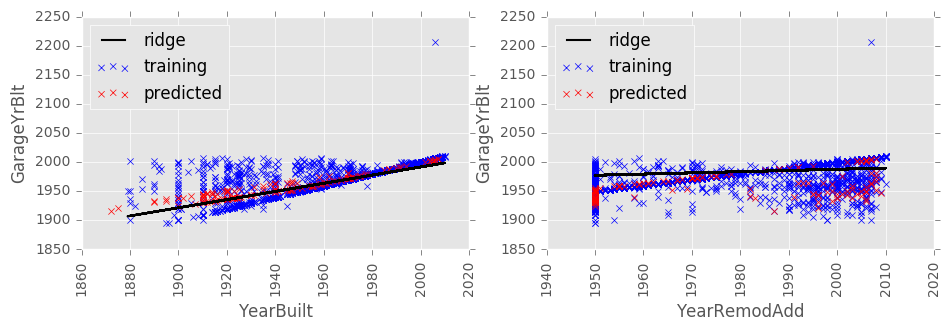

In [51]:
plt.subplots(figsize=(11, 3))
for i in range(ncols):
    plt.subplot(1, 2, i + 1)
    plt.scatter(X_train[:, i], y_train, label='training', marker='x')
    plt.scatter(X_test[:, i], y_test, label='predicted', marker='x', color='red')
    plt.plot(X_train[:, i], reg_line[:, i], label='ridge', color='black', linewidth=1.5)
    plt.xticks(rotation=90)
    plt.xlabel(['YearBuilt', 'YearRemodAdd'][i])
    plt.ylabel('GarageYrBlt')
    plt.legend(loc='upper left')
plt.show()

In [52]:
df5.loc[is_na, ['GarageYrBlt']] = y_test
df5[['GarageYrBlt']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2919 entries, 1 to 2919
Data columns (total 1 columns):
GarageYrBlt    2919 non-null float64
dtypes: float64(1)
memory usage: 45.6 KB


### Other features

In [53]:
df6 = df5.copy()

In [54]:
def fillna_resample(data, avg=1):
    """Fills missing values in a feature using a resampling method.
    
    Inputs:
        data  Feature data as a pandas.Series object.
        avg   Number of results to average (numerical features only).
    
    Outputs:
        New pandas.Series object with all NAs filled.
    """
    n = data.isnull().sum()
    
    sample = data.dropna().sample(n, replace=True, random_state=42).as_matrix()
    if sample.dtype != 'object':
        for i in range(1, avg):
            sample += data.dropna().sample(n, replace=True, random_state=42)
        sample /= avg
    
    filled = data.copy()
    filled[filled.isnull()] = sample
    
    return filled

In [55]:
has_na_cat = ['BsmtFullBath', 'Exterior1st', 'Exterior2nd', 'GarageCars',
              'KitchenQual', 'MSZoning', 'MasVnrType', 'SaleType']
has_na_cont = ['BsmtFinSF1', 'BsmtUnfSF', 'GarageArea', 'LotFrontage',
               'MasVnrArea', 'TotalBsmtSF']

df6[has_na_cat] = df6[has_na_cat].apply(fillna_resample, axis=0)
df6[has_na_cont] = df6[has_na_cont].apply(fillna_resample, args=(3,), axis=0)

In [56]:
df6[has_na_cat + has_na_cont].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2919 entries, 1 to 2919
Data columns (total 14 columns):
BsmtFullBath    2919 non-null float64
Exterior1st     2919 non-null object
Exterior2nd     2919 non-null object
GarageCars      2919 non-null float64
KitchenQual     2919 non-null float64
MSZoning        2919 non-null object
MasVnrType      2919 non-null object
SaleType        2919 non-null object
BsmtFinSF1      2919 non-null float64
BsmtUnfSF       2919 non-null float64
GarageArea      2919 non-null float64
LotFrontage     2919 non-null float64
MasVnrArea      2919 non-null float64
TotalBsmtSF     2919 non-null float64
dtypes: float64(9), object(5)
memory usage: 285.1+ KB


## 6. One-hot encoding
The machine learning algorithms in Scikit-learn can't handle strings, so all nominal variables in the data set need to be converted. But we can't just convert their values to integers the same way it was done for ordinal variables, since nominal values have no implicit order. The solution is to use one-hot encoding, i.e., to convert each nominal variable with `k` possible values to a set of `k` binary variables. 

In [57]:
df7 = pd.get_dummies(df6)
df7.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2919 entries, 1 to 2919
Columns: 187 entries, 1stFlrSF to SaleType_WD
dtypes: float64(174), int64(13)
memory usage: 4.2 MB


In [58]:
df7.head()

,1stFlrSF,2ndFlrSF,BedroomAbvGr,BsmtExposure,BsmtFinSF1,BsmtFinType1,BsmtFullBath,BsmtQual,BsmtUnfSF,ExterQual,...,SaleCondition_Partial,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD
Id,,,,,,,,,,,,,,,,,,,,,
1,6.753438,6.751101,3,0.693147,6.561031,6,1.0,1.609438,5.017280,1.609438,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,7.141245,0.000000,3,1.609438,6.886532,5,0.0,1.609438,5.652489,1.386294,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,6.825460,6.765039,3,1.098612,6.188264,6,1.0,1.609438,6.075346,1.609438,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,6.869014,6.629363,3,0.693147,5.379897,5,1.0,1.386294,6.293419,1.386294,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
5,7.044033,6.960348,4,1.386294,6.486161,6,1.0,1.609438,6.196444,1.609438,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [59]:
df7.tail()

,1stFlrSF,2ndFlrSF,BedroomAbvGr,BsmtExposure,BsmtFinSF1,BsmtFinType1,BsmtFullBath,BsmtQual,BsmtUnfSF,ExterQual,...,SaleCondition_Partial,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD
Id,,,,,,,,,,,,,,,,,,,,,
2915,6.304449,6.304449,3,0.693147,0.000000,1,0.0,1.386294,6.304449,1.386294,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2916,6.304449,6.304449,3,0.693147,5.533389,3,0.0,1.386294,5.686975,1.386294,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2917,7.110696,0.000000,4,0.693147,7.110696,5,1.0,1.386294,0.000000,1.386294,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2918,6.878326,0.000000,3,1.386294,5.823046,6,0.0,1.609438,6.356108,1.386294,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2919,6.904751,6.912743,3,1.386294,6.632002,2,0.0,1.609438,5.476464,1.386294,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


## 7. Feature scaling
For many algorithms, having all input features in the same scale of values can make the learning process more robust. This is done here by putting every feature value in the `[0, 1]` range.

In [60]:
from sklearn.preprocessing import MinMaxScaler

In [61]:
df8 = df7.astype(np.float64)
df8.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2919 entries, 1 to 2919
Columns: 187 entries, 1stFlrSF to SaleType_WD
dtypes: float64(187)
memory usage: 4.2 MB


In [62]:
for col in df8.columns:
    if col != 'SalePrice':
        df8[col] = MinMaxScaler(feature_range=(0, 1)).fit_transform(df8[[col]])

df8.head()

,1stFlrSF,2ndFlrSF,BedroomAbvGr,BsmtExposure,BsmtFinSF1,BsmtFinType1,BsmtFullBath,BsmtQual,BsmtUnfSF,ExterQual,...,SaleCondition_Partial,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD
Id,,,,,,,,,,,,,,,,,,,,,
1,0.345070,0.884420,0.375,0.430677,0.759508,1.000000,0.333333,0.898244,0.646838,0.736966,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.487537,0.000000,0.375,1.000000,0.797188,0.833333,0.000000,0.898244,0.728731,0.415037,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.371528,0.886245,0.375,0.682606,0.716357,1.000000,0.333333,0.898244,0.783246,0.736966,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.387529,0.868471,0.375,0.430677,0.622780,0.833333,0.333333,0.773706,0.811361,0.415037,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
5,0.451824,0.911832,0.500,0.861353,0.750841,1.000000,0.333333,0.898244,0.798858,0.736966,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [63]:
df8.drop('SalePrice', axis=1).describe()

,1stFlrSF,2ndFlrSF,BedroomAbvGr,BsmtExposure,BsmtFinSF1,BsmtFinType1,BsmtFullBath,BsmtQual,BsmtUnfSF,ExterQual,...,SaleCondition_Partial,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD
count,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,...,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000
mean,0.437186,0.370686,0.357528,0.554709,0.489083,0.590271,0.143314,0.818979,0.725516,0.539475,...,0.083933,0.029805,0.004111,0.001713,0.008907,0.003083,0.002741,0.081877,0.002398,0.865365
std,0.118530,0.429302,0.102837,0.228581,0.345179,0.352309,0.174907,0.162166,0.240644,0.184104,...,0.277335,0.170077,0.063996,0.041359,0.093973,0.055451,0.052289,0.274225,0.048920,0.341392
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.353544,0.000000,0.250000,0.430677,0.000000,0.166667,0.000000,0.773706,0.695942,0.415037,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,0.431053,0.000000,0.375000,0.430677,0.684237,0.666667,0.000000,0.898244,0.792673,0.415037,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,0.522339,0.859148,0.375000,0.682606,0.763847,1.000000,0.333333,0.898244,0.862917,0.736966,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## 7. Saving the results
Finally, the training and test data sets are separated again and saved as two distinct CSV files.

In [64]:
sorted_cols = sorted(df8.columns)
sorted_cols.remove('SalePrice')
sorted_cols.append('SalePrice')
df8 = df8.reindex_axis(sorted_cols, axis=1)

In [65]:
df_train = df8.loc[df8['SalePrice'].notnull(), :]
df_test = df8.loc[df8['SalePrice'].isnull(), :].drop('SalePrice', axis=1)

df_train.shape, df_test.shape

((1460, 187), (1459, 186))

In [66]:
df_train.to_csv('train_clean.csv')
df_test.to_csv('test_clean.csv')

Now our data is in good shape to be processed by some machine learning algorithm.